In [283]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import pandas as pd
import cv2

In [59]:
df_profiles = pd.read_csv('../data/raw/profiles.csv')
df_profiles

pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p56  p57  \
0      196356  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1      204083  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2      170667  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
3      115511  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
4      129719  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
5      174347  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
6      143618  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
7      116999  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
8      194535  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
9      125275  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
10     138709  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
11     145774  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
12     110116  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
13     127217  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
14     153142  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
15     115485  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
16     113666  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
17     122046  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
18     167717  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
19     141405  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
20     186565  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
21     165770  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
22     127706  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
23     113516  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
24     127912  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
25     135378  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
26     215572  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
27     104039  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
28     101221  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
29     133559  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
63060  177571  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63061  160099  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63062  187865  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63063  151880  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63064  204949  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63065  158320  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63066  148673  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63067  209025  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63068  192010  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63069  123444  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63070  180496  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63071  155958  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63072  185094  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63073  164127  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63074  187839  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63075  179816  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63076  138212  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63077  100087  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63078  215762  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63079  161736  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63080 

In [5]:
df_profiles.shape

(63090, 67)

In [4]:
'''to do: play around with common linkage methods 'single', 'complete', 'average', 
or different distance metrics 'euclidean' (default)'''
'''cuttree with k certain amount of clusters'''
# generate the linkage matrix
Z = linkage(df_profiles, 'ward')

In [5]:
Z

array([[4.31540000e+04, 4.76570000e+04, 1.41421356e+00, 2.00000000e+00],
       [1.90300000e+03, 6.24780000e+04, 1.73205081e+00, 2.00000000e+00],
       [2.47500000e+03, 1.84540000e+04, 1.73205081e+00, 2.00000000e+00],
       ...,
       [1.26172000e+05, 1.26173000e+05, 2.70976106e+06, 2.57220000e+04],
       [1.26174000e+05, 1.26175000e+05, 4.63896804e+06, 3.73680000e+04],
       [1.26176000e+05, 1.26177000e+05, 1.02552319e+07, 6.30900000e+04]])

In [7]:
np.save('../data/task2/hier.npy', Z)

In [8]:
np.save('../data/task2/hier.txt', Z)

In [11]:
T = np.load('../data/task2/hier.npy')
T

array([[4.31540000e+04, 4.76570000e+04, 1.41421356e+00, 2.00000000e+00],
       [1.90300000e+03, 6.24780000e+04, 1.73205081e+00, 2.00000000e+00],
       [2.47500000e+03, 1.84540000e+04, 1.73205081e+00, 2.00000000e+00],
       ...,
       [1.26172000e+05, 1.26173000e+05, 2.70976106e+06, 2.57220000e+04],
       [1.26174000e+05, 1.26175000e+05, 4.63896804e+06, 3.73680000e+04],
       [1.26176000e+05, 1.26177000e+05, 1.02552319e+07, 6.30900000e+04]])

In [176]:
df_hierar = pd.DataFrame(T, columns = ['pid_1', 'pid_2', 'dist', 'sample_count'])
df_hierar

pid_1     pid_2          dist  sample_count
0       43154.0   47657.0  1.414214e+00           2.0
1        1903.0   62478.0  1.732051e+00           2.0
2        2475.0   18454.0  1.732051e+00           2.0
3       46763.0   46880.0  1.732051e+00           2.0
4       18159.0   45007.0  1.732051e+00           2.0
5        7512.0   40537.0  1.732051e+00           2.0
6       25018.0   51927.0  1.732051e+00           2.0
7       12657.0   57303.0  1.732051e+00           2.0
8       36289.0   40117.0  1.732051e+00           2.0
9        4931.0   46689.0  2.000000e+00           2.0
10       5550.0   39277.0  2.000000e+00           2.0
11        729.0   17371.0  2.000000e+00           2.0
12       1199.0   32556.0  2.000000e+00           2.0
13      20880.0   29756.0  2.000000e+00           2.0
14      27759.0   58736.0  2.000000e+00           2.0
15       5047.0   51813.0  2.000000e+00           2.0
16       5082.0   14460.0  2.000000e+00           2.0
17       5316.0    6928.0  2.000000e+00           2.0
18       5923.0   12413.0  2.000000e+00           2.0
19       6092.0   54061.0  2.000000e+00           2.0
20      17289.0   28895.0  2.000000e+00           2.0
21       7423.0   29767.0  2.000000e+00           2.0
22      13791.0   41370.0  2.000000e+00           2.0
23      23531.0   53886.0  2.000000e+00           2.0
24      38176.0   49667.0  2.000000e+00           2.0
25      41420.0   60420.0  2.000000e+00           2.0
26      13594.0   39314.0  2.000000e+00           2.0
27      14538.0   51080.0  2.000000e+00           2.0
28      35027.0   53574.0  2.000000e+00           2.0
29      25395.0   45143.0  2.000000e+00           2.0
...         ...       ...           ...           ...
63059  126109.0  126123.0  1.087006e+05        3092.0
63060  126102.0  126131.0  1.103803e+05        3120.0
63061  126112.0  126127.0  1.144897e+05        3110.0
63062  126118.0  126128.0  1.203051e+05        3219.0
63063  126119.0  126134.0  1.386783e+05        3574.0
63064  126122.0  126137.0  1.459678e+05        3732.0
63065  126121.0  126140.0  1.548532e+05        3912.0
63066  126132.0  126136.0  1.685017e+05        3997.0
63067  126135.0  126139.0  1.769202e+05        4167.0
63068  126126.0  126144.0  1.854512e+05        4424.0
63069  126133.0  126141.0  1.870003e+05        4284.0
63070  126125.0  126149.0  2.051242e+05        4801.0
63071  126130.0  126145.0  2.101953e+05        4721.0
63072  126138.0  126146.0  2.402644e+05        5179.0
63073  126143.0  126147.0  2.613892e+05        5471.0
63074  126142.0  126152.0  2.821599e+05        5694.0
63075  126148.0  126157.0  3.917157e+05        7071.0
63076  126151.0  126156.0  3.930307e+05        7107.0
63077  126150.0  126158.0  4.200800e+05        7544.0
63078  126154.0  126159.0  4.746057e+05        8016.0
63079  126153.0  126163.0  5.425402e+05        9045.0
63080  126161.0  126162.0  6.358364e+05        9900.0
63081  126160.0  126166.0  8.380540e+05       11908.0
63082  126155.0  126169.0  8.761780e+05       12957.0
63083  126164.0  126165.0  9.534468e+05       12765.0
63084  126167.0  126168.0  1.263563e+06       15560.0
63085  126170.0  126171.0  2.103807e+06       21808.0
63086  126172.0  126173.0  2.709761e+06       25722.0
63087  126174.0  126175.0  4.638968e+06       37368.0
63088  126176.0  126177.0  1.025523e+07       63090.0

[63089 rows x 4 columns]

In [177]:
df_h = df_hierar
df_h['p_features'] = pd.Series(np.nan, index=df_h.index)
df_h

pid_1     pid_2          dist  sample_count  p_features
0       43154.0   47657.0  1.414214e+00           2.0         NaN
1        1903.0   62478.0  1.732051e+00           2.0         NaN
2        2475.0   18454.0  1.732051e+00           2.0         NaN
3       46763.0   46880.0  1.732051e+00           2.0         NaN
4       18159.0   45007.0  1.732051e+00           2.0         NaN
5        7512.0   40537.0  1.732051e+00           2.0         NaN
6       25018.0   51927.0  1.732051e+00           2.0         NaN
7       12657.0   57303.0  1.732051e+00           2.0         NaN
8       36289.0   40117.0  1.732051e+00           2.0         NaN
9        4931.0   46689.0  2.000000e+00           2.0         NaN
10       5550.0   39277.0  2.000000e+00           2.0         NaN
11        729.0   17371.0  2.000000e+00           2.0         NaN
12       1199.0   32556.0  2.000000e+00           2.0         NaN
13      20880.0   29756.0  2.000000e+00           2.0         NaN
14      27759.0   58736.0  2.000000e+00           2.0         NaN
15       5047.0   51813.0  2.000000e+00           2.0         NaN
16       5082.0   14460.0  2.000000e+00           2.0         NaN
17       5316.0    6928.0  2.000000e+00           2.0         NaN
18       5923.0   12413.0  2.000000e+00           2.0         NaN
19       6092.0   54061.0  2.000000e+00           2.0         NaN
20      17289.0   28895.0  2.000000e+00           2.0         NaN
21       7423.0   29767.0  2.000000e+00           2.0         NaN
22      13791.0   41370.0  2.000000e+00           2.0         NaN
23      23531.0   53886.0  2.000000e+00           2.0         NaN
24      38176.0   49667.0  2.000000e+00           2.0         NaN
25      41420.0   60420.0  2.000000e+00           2.0         NaN
26      13594.0   39314.0  2.000000e+00           2.0         NaN
27      14538.0   51080.0  2.000000e+00           2.0         NaN
28      35027.0   53574.0  2.000000e+00           2.0         NaN
29      25395.0   45143.0  2.000000e+00           2.0         NaN
...         ...       ...           ...           ...         ...
63059  126109.0  126123.0  1.087006e+05        3092.0         NaN
63060  126102.0  126131.0  1.103803e+05        3120.0         NaN
63061  126112.0  126127.0  1.144897e+05        3110.0         NaN
63062  126118.0  126128.0  1.203051e+05        3219.0         NaN
63063  126119.0  126134.0  1.386783e+05        3574.0         NaN
63064  126122.0  126137.0  1.459678e+05        3732.0         NaN
63065  126121.0  126140.0  1.548532e+05        3912.0         NaN
63066  126132.0  126136.0  1.685017e+05        3997.0         NaN
63067  126135.0  126139.0  1.769202e+05        4167.0         NaN
63068  126126.0  126144.0  1.854512e+05        4424.0         NaN
63069  126133.0  126141.0  1.870003e+05        4284.0         NaN
63070  126125.0  126149.0  2.051242e+05        4801.0         NaN
63071  126130.0  126145.0  2.101953e+05        4721.0         NaN
63072  126138.0  126146.0  2.402644e+05        5179.0         NaN
63073  126143.0  126147.0  2.613892e+05        5471.0         NaN
63074  126142.0  126152.0  2.821599e+05        5694.0         NaN
63075  126148.0  126157.0  3.917157e+05        7071.0         NaN
63076  126151.0  126156.0  3.930307e+05        7107.0         NaN
63077  126150.0  126158.0  4.200800e+05        7544.0         NaN
63078  126154.0  126159.0  4.746057e+05        8016.0         NaN
63079  126153.0  126163.0  5.425402e+05        9045.0         NaN
63080  126161.0  126162.0  6.358364e+05        9900.0         NaN
63081  126160.0  126166.0  8.380540e+05       11908.0         NaN
63082  126155.0  126169.0  8.761780e+05       12957.0         NaN
63083  126164.0  126165.0  9.534468e+05       12765.0         NaN
63084  126167.0  126168.0  1.263563e+06       15560.0         NaN
63085  126170.0  126171.0  2.103807e+06       21808.0         NaN
63086  126172.0  126173.0  2.709761e+06       25722.0         NaN
63087  126174.0  126175.0  4.638968e+06       3736

In [44]:
df_hierar[df_hierar.idx1 == 1]

idx1     idx2  dist  sample_count
24588   1.0  31094.0   4.0           2.0

In [50]:
df_hierar[df_hierar.idx1 == 31095]

idx1     idx2      dist  sample_count
17567  31095.0  77621.0  3.696846           3.0

In [ ]:
X[[33, 68, 62]]

In [79]:
i = 1
k = f'p{i}'
k

'p1'

In [127]:
df_a = df_profiles[df_profiles.index == 1]
df_a

pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p56  p57  p58  \
1  204083  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   

   p59  p60  p61  p62  p63  p64  p65  
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  

[1 rows x 67 columns]

In [136]:
df_a.p0.values[0]

1.0

In [145]:
df_a['p0'].values[0]

1.0

In [155]:
df_a = df_profiles[df_profiles.index == 1]
p = []

for i in range(66):
    j = f'p{i}'
    k = df_a[j].values[0]
    p.append(k)
p

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [157]:
df_a = df_profiles[df_profiles.index == 31094]
q = []

for i in range(66):
    j = f'p{i}'
    k = df_a[j].values[0]
    q.append(k)
q

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [159]:
a = []

for i in range(len(p)):
    if p[i] == q[i]:
        r = f'p{i}'
        a.append(r)
len(a)

51

In [66]:
x = df_profiles[df_profiles.index == 1]
y = df_profiles[df_profiles.index == 31094]
x, y

(      pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p56  p57  p58  \
 1  204083  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
 
    p59  p60  p61  p62  p63  p64  p65  
 1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  
 
 [1 rows x 67 columns],
           pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p56  p57  \
 31094  204084  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
 
        p58  p59  p60  p61  p62  p63  p64  p65  
 31094  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
 
 [1 rows x 67 columns])

In [27]:
for i in range(len(T)):
    print (T[i])

[4.31540000e+04 4.76570000e+04 1.41421356e+00 2.00000000e+00]
[1.90300000e+03 6.24780000e+04 1.73205081e+00 2.00000000e+00]
[2.47500000e+03 1.84540000e+04 1.73205081e+00 2.00000000e+00]
[4.67630000e+04 4.68800000e+04 1.73205081e+00 2.00000000e+00]
[1.81590000e+04 4.50070000e+04 1.73205081e+00 2.00000000e+00]
[7.51200000e+03 4.05370000e+04 1.73205081e+00 2.00000000e+00]
[2.50180000e+04 5.19270000e+04 1.73205081e+00 2.00000000e+00]
[1.26570000e+04 5.73030000e+04 1.73205081e+00 2.00000000e+00]
[3.62890000e+04 4.01170000e+04 1.73205081e+00 2.00000000e+00]
[4.9310e+03 4.6689e+04 2.0000e+00 2.0000e+00]
[5.5500e+03 3.9277e+04 2.0000e+00 2.0000e+00]
[7.2900e+02 1.7371e+04 2.0000e+00 2.0000e+00]
[1.1990e+03 3.2556e+04 2.0000e+00 2.0000e+00]
[2.0880e+04 2.9756e+04 2.0000e+00 2.0000e+00]
[2.7759e+04 5.8736e+04 2.0000e+00 2.0000e+00]
[5.0470e+03 5.1813e+04 2.0000e+00 2.0000e+00]
[5.082e+03 1.446e+04 2.000e+00 2.000e+00]
[5.316e+03 6.928e+03 2.000e+00 2.000e+00]
[5.9230e+03 1.2413e+04 2.0000e+00 2.

[3.49080000e+04 4.23840000e+04 2.64575131e+00 2.00000000e+00]
[2.66530000e+04 3.15440000e+04 2.64575131e+00 2.00000000e+00]
[3.09410000e+04 3.16810000e+04 2.64575131e+00 2.00000000e+00]
[4.96940000e+04 6.26650000e+04 2.64575131e+00 2.00000000e+00]
[2.99890000e+04 5.28240000e+04 2.64575131e+00 2.00000000e+00]
[2.20230000e+04 3.82130000e+04 2.64575131e+00 2.00000000e+00]
[2.80470000e+04 5.30960000e+04 2.64575131e+00 2.00000000e+00]
[5.43550000e+04 5.54060000e+04 2.64575131e+00 2.00000000e+00]
[2.24170000e+04 4.57490000e+04 2.64575131e+00 2.00000000e+00]
[6.13630000e+04 6.14340000e+04 2.64575131e+00 2.00000000e+00]
[2.82410000e+04 5.18750000e+04 2.64575131e+00 2.00000000e+00]
[2.76680000e+04 3.88890000e+04 2.64575131e+00 2.00000000e+00]
[2.29490000e+04 5.98370000e+04 2.64575131e+00 2.00000000e+00]
[2.29830000e+04 5.88480000e+04 2.64575131e+00 2.00000000e+00]
[2.96040000e+04 5.95460000e+04 2.64575131e+00 2.00000000e+00]
[2.30510000e+04 3.81170000e+04 2.64575131e+00 2.00000000e+00]
[3.65350

[1.25680000e+04 3.76360000e+04 2.82842712e+00 2.00000000e+00]
[1.25980000e+04 3.50310000e+04 2.82842712e+00 2.00000000e+00]
[3.98710000e+04 5.79000000e+04 2.82842712e+00 2.00000000e+00]
[1.64740000e+04 4.36150000e+04 2.82842712e+00 2.00000000e+00]
[2.29140000e+04 2.91380000e+04 2.82842712e+00 2.00000000e+00]
[1.27180000e+04 1.59300000e+04 2.82842712e+00 2.00000000e+00]
[2.60690000e+04 5.06190000e+04 2.82842712e+00 2.00000000e+00]
[1.29490000e+04 3.66240000e+04 2.82842712e+00 2.00000000e+00]
[1.78270000e+04 2.49010000e+04 2.82842712e+00 2.00000000e+00]
[1.30220000e+04 4.88650000e+04 2.82842712e+00 2.00000000e+00]
[1.30300000e+04 4.04990000e+04 2.82842712e+00 2.00000000e+00]
[3.53350000e+04 5.13020000e+04 2.82842712e+00 2.00000000e+00]
[1.30630000e+04 1.70600000e+04 2.82842712e+00 2.00000000e+00]
[2.32790000e+04 5.65970000e+04 2.82842712e+00 2.00000000e+00]
[2.43890000e+04 6.14000000e+04 2.82842712e+00 2.00000000e+00]
[3.50970000e+04 5.75260000e+04 2.82842712e+00 2.00000000e+00]
[3.07460

[4.2960e+03 4.0068e+04 3.0000e+00 2.0000e+00]
[2.9401e+04 4.9984e+04 3.0000e+00 2.0000e+00]
[2.5173e+04 2.6967e+04 3.0000e+00 2.0000e+00]
[4.3320e+03 1.5889e+04 3.0000e+00 2.0000e+00]
[6.1280e+03 3.4437e+04 3.0000e+00 2.0000e+00]
[4.361e+03 1.743e+04 3.000e+00 2.000e+00]
[4.3810e+03 1.5507e+04 3.0000e+00 2.0000e+00]
[4.3850e+03 2.4119e+04 3.0000e+00 2.0000e+00]
[4.3870e+03 1.5428e+04 3.0000e+00 2.0000e+00]
[1.6147e+04 3.7587e+04 3.0000e+00 2.0000e+00]
[4.3950e+03 5.6644e+04 3.0000e+00 2.0000e+00]
[2.6659e+04 4.8354e+04 3.0000e+00 2.0000e+00]
[2.6900e+04 4.6774e+04 3.0000e+00 2.0000e+00]
[3.0334e+04 3.6397e+04 3.0000e+00 2.0000e+00]
[4.445e+03 8.415e+03 3.000e+00 2.000e+00]
[4.4780e+03 5.6955e+04 3.0000e+00 2.0000e+00]
[4.491e+03 3.806e+04 3.000e+00 2.000e+00]
[8.9500e+03 2.6658e+04 3.0000e+00 2.0000e+00]
[2.7822e+04 5.3850e+04 3.0000e+00 2.0000e+00]
[6.3270e+03 2.2524e+04 3.0000e+00 2.0000e+00]
[2.6873e+04 5.1440e+04 3.0000e+00 2.0000e+00]
[1.4290e+04 5.9804e+04 3.0000e+00 2.0000e+00]


[2.8782e+04 5.3712e+04 3.0000e+00 2.0000e+00]
[3.0603e+04 4.3051e+04 3.0000e+00 2.0000e+00]
[3.1119e+04 5.0435e+04 3.0000e+00 2.0000e+00]
[2.1519e+04 3.2443e+04 3.0000e+00 2.0000e+00]
[1.5474e+04 3.8462e+04 3.0000e+00 2.0000e+00]
[2.8143e+04 5.3902e+04 3.0000e+00 2.0000e+00]
[2.4729e+04 4.0389e+04 3.0000e+00 2.0000e+00]
[2.7072e+04 4.1835e+04 3.0000e+00 2.0000e+00]
[1.5543e+04 5.0793e+04 3.0000e+00 2.0000e+00]
[2.4191e+04 6.0800e+04 3.0000e+00 2.0000e+00]
[4.4643e+04 5.3331e+04 3.0000e+00 2.0000e+00]
[1.6372e+04 3.8415e+04 3.0000e+00 2.0000e+00]
[5.5671e+04 5.8535e+04 3.0000e+00 2.0000e+00]
[1.5721e+04 2.0415e+04 3.0000e+00 2.0000e+00]
[1.5739e+04 4.9466e+04 3.0000e+00 2.0000e+00]
[1.5769e+04 5.7913e+04 3.0000e+00 2.0000e+00]
[3.2437e+04 5.0131e+04 3.0000e+00 2.0000e+00]
[4.7912e+04 4.9871e+04 3.0000e+00 2.0000e+00]
[1.5845e+04 5.1478e+04 3.0000e+00 2.0000e+00]
[1.5872e+04 5.1985e+04 3.0000e+00 2.0000e+00]
[1.5888e+04 2.8645e+04 3.0000e+00 2.0000e+00]
[1.5903e+04 5.9290e+04 3.0000e+00 

[1.69200000e+03 2.91220000e+04 3.16227766e+00 2.00000000e+00]
[2.06440000e+04 2.73070000e+04 3.16227766e+00 2.00000000e+00]
[4.19930000e+04 4.38200000e+04 3.16227766e+00 2.00000000e+00]
[1.48370000e+04 5.52330000e+04 3.16227766e+00 2.00000000e+00]
[1.71500000e+03 8.12300000e+03 3.16227766e+00 2.00000000e+00]
[1.71900000e+03 4.31450000e+04 3.16227766e+00 2.00000000e+00]
[9.44200000e+03 2.58710000e+04 3.16227766e+00 2.00000000e+00]
[1.74100000e+03 5.43800000e+04 3.16227766e+00 2.00000000e+00]
[1.75000000e+03 6.28500000e+03 3.16227766e+00 2.00000000e+00]
[4.81200000e+03 1.19230000e+04 3.16227766e+00 2.00000000e+00]
[1.77000000e+03 4.62720000e+04 3.16227766e+00 2.00000000e+00]
[1.77800000e+03 5.43870000e+04 3.16227766e+00 2.00000000e+00]
[7.65400000e+03 3.54590000e+04 3.16227766e+00 2.00000000e+00]
[1.80000000e+03 1.59580000e+04 3.16227766e+00 2.00000000e+00]
[1.81100000e+03 4.32140000e+04 3.16227766e+00 2.00000000e+00]
[1.82500000e+03 3.32030000e+04 3.16227766e+00 2.00000000e+00]
[1.83600

[2.40570000e+04 4.08790000e+04 3.16227766e+00 2.00000000e+00]
[2.96720000e+04 4.69390000e+04 3.16227766e+00 2.00000000e+00]
[8.31700000e+03 6.10560000e+04 3.16227766e+00 2.00000000e+00]
[8.90600000e+03 1.04730000e+04 3.16227766e+00 2.00000000e+00]
[8.33800000e+03 1.81470000e+04 3.16227766e+00 2.00000000e+00]
[1.10140000e+04 5.57670000e+04 3.16227766e+00 2.00000000e+00]
[4.82520000e+04 5.10040000e+04 3.16227766e+00 2.00000000e+00]
[5.34060000e+04 5.42630000e+04 3.16227766e+00 2.00000000e+00]
[8.40000000e+03 5.89120000e+04 3.16227766e+00 2.00000000e+00]
[4.73810000e+04 5.47640000e+04 3.16227766e+00 2.00000000e+00]
[8.43700000e+03 3.61660000e+04 3.16227766e+00 2.00000000e+00]
[8.43900000e+03 3.88360000e+04 3.16227766e+00 2.00000000e+00]
[8.45100000e+03 1.92340000e+04 3.16227766e+00 2.00000000e+00]
[2.07720000e+04 5.03560000e+04 3.16227766e+00 2.00000000e+00]
[8.46300000e+03 3.83780000e+04 3.16227766e+00 2.00000000e+00]
[1.65350000e+04 3.37720000e+04 3.16227766e+00 2.00000000e+00]
[4.81720

[1.88420000e+04 4.27550000e+04 3.16227766e+00 2.00000000e+00]
[2.79570000e+04 4.55390000e+04 3.16227766e+00 2.00000000e+00]
[4.99100000e+04 5.62730000e+04 3.16227766e+00 2.00000000e+00]
[5.77970000e+04 6.20020000e+04 3.16227766e+00 2.00000000e+00]
[1.89460000e+04 5.81790000e+04 3.16227766e+00 2.00000000e+00]
[5.96170000e+04 6.14850000e+04 3.16227766e+00 2.00000000e+00]
[3.20740000e+04 6.15600000e+04 3.16227766e+00 2.00000000e+00]
[1.90180000e+04 3.75050000e+04 3.16227766e+00 2.00000000e+00]
[4.64700000e+04 5.98650000e+04 3.16227766e+00 2.00000000e+00]
[1.90520000e+04 1.94550000e+04 3.16227766e+00 2.00000000e+00]
[3.08900000e+04 5.23790000e+04 3.16227766e+00 2.00000000e+00]
[1.90680000e+04 3.15910000e+04 3.16227766e+00 2.00000000e+00]
[3.48230000e+04 4.18940000e+04 3.16227766e+00 2.00000000e+00]
[1.90880000e+04 4.90950000e+04 3.16227766e+00 2.00000000e+00]
[1.90930000e+04 2.35920000e+04 3.16227766e+00 2.00000000e+00]
[1.91040000e+04 4.89380000e+04 3.16227766e+00 2.00000000e+00]
[2.63730

[1.90900000e+03 1.88720000e+04 3.31662479e+00 2.00000000e+00]
[1.92300000e+03 6.65100000e+03 3.31662479e+00 2.00000000e+00]
[2.29200000e+03 5.29990000e+04 3.31662479e+00 2.00000000e+00]
[1.15080000e+04 5.61690000e+04 3.31662479e+00 2.00000000e+00]
[1.93500000e+03 2.48600000e+03 3.31662479e+00 2.00000000e+00]
[1.94500000e+03 1.67140000e+04 3.31662479e+00 2.00000000e+00]
[1.94900000e+03 4.05760000e+04 3.31662479e+00 2.00000000e+00]
[1.95800000e+03 4.50190000e+04 3.31662479e+00 2.00000000e+00]
[1.96000000e+03 3.45010000e+04 3.31662479e+00 2.00000000e+00]
[7.35400000e+03 3.02940000e+04 3.31662479e+00 2.00000000e+00]
[1.96700000e+03 6.26500000e+03 3.31662479e+00 2.00000000e+00]
[1.96900000e+03 2.16400000e+04 3.31662479e+00 2.00000000e+00]
[5.75900000e+03 3.10250000e+04 3.31662479e+00 2.00000000e+00]
[1.08810000e+04 5.14980000e+04 3.31662479e+00 2.00000000e+00]
[1.97600000e+03 5.12850000e+04 3.31662479e+00 2.00000000e+00]
[1.98200000e+03 6.22570000e+04 3.31662479e+00 2.00000000e+00]
[1.99100

[6.78300000e+03 1.04110000e+04 3.31662479e+00 2.00000000e+00]
[6.78400000e+03 9.79700000e+03 3.31662479e+00 2.00000000e+00]
[2.93380000e+04 5.67020000e+04 3.31662479e+00 2.00000000e+00]
[6.81500000e+03 1.45220000e+04 3.31662479e+00 2.00000000e+00]
[2.63070000e+04 4.81680000e+04 3.31662479e+00 2.00000000e+00]
[1.25370000e+04 6.27830000e+04 3.31662479e+00 2.00000000e+00]
[3.05210000e+04 3.91690000e+04 3.31662479e+00 2.00000000e+00]
[3.34620000e+04 5.35680000e+04 3.31662479e+00 2.00000000e+00]
[6.83000000e+03 1.21470000e+04 3.31662479e+00 2.00000000e+00]
[6.83400000e+03 1.52220000e+04 3.31662479e+00 2.00000000e+00]
[6.83700000e+03 5.25390000e+04 3.31662479e+00 2.00000000e+00]
[6.83900000e+03 6.25200000e+04 3.31662479e+00 2.00000000e+00]
[6.84100000e+03 1.17580000e+04 3.31662479e+00 2.00000000e+00]
[9.29300000e+03 3.29730000e+04 3.31662479e+00 2.00000000e+00]
[6.84600000e+03 3.59800000e+04 3.31662479e+00 2.00000000e+00]
[3.49230000e+04 3.65020000e+04 3.31662479e+00 2.00000000e+00]
[1.41340

[1.06360000e+04 5.97740000e+04 3.31662479e+00 2.00000000e+00]
[1.83590000e+04 2.18950000e+04 3.31662479e+00 2.00000000e+00]
[4.23730000e+04 5.77850000e+04 3.31662479e+00 2.00000000e+00]
[1.06700000e+04 2.00920000e+04 3.31662479e+00 2.00000000e+00]
[1.06720000e+04 1.98740000e+04 3.31662479e+00 2.00000000e+00]
[1.06770000e+04 2.78640000e+04 3.31662479e+00 2.00000000e+00]
[2.30050000e+04 6.08700000e+04 3.31662479e+00 2.00000000e+00]
[2.16220000e+04 3.80990000e+04 3.31662479e+00 2.00000000e+00]
[1.07050000e+04 4.22240000e+04 3.31662479e+00 2.00000000e+00]
[1.07090000e+04 2.65530000e+04 3.31662479e+00 2.00000000e+00]
[1.07230000e+04 3.68180000e+04 3.31662479e+00 2.00000000e+00]
[1.07300000e+04 6.05530000e+04 3.31662479e+00 2.00000000e+00]
[1.07490000e+04 5.46600000e+04 3.31662479e+00 2.00000000e+00]
[1.26880000e+04 2.45760000e+04 3.31662479e+00 2.00000000e+00]
[4.07850000e+04 6.17380000e+04 3.31662479e+00 2.00000000e+00]
[3.06950000e+04 5.43610000e+04 3.31662479e+00 2.00000000e+00]
[2.04160

[2.76800000e+04 3.70220000e+04 3.31662479e+00 2.00000000e+00]
[4.05240000e+04 4.12000000e+04 3.31662479e+00 2.00000000e+00]
[2.55160000e+04 2.88980000e+04 3.31662479e+00 2.00000000e+00]
[4.64080000e+04 5.26670000e+04 3.31662479e+00 2.00000000e+00]
[2.08840000e+04 5.53190000e+04 3.31662479e+00 2.00000000e+00]
[2.08850000e+04 2.40080000e+04 3.31662479e+00 2.00000000e+00]
[2.09080000e+04 5.61060000e+04 3.31662479e+00 2.00000000e+00]
[2.42100000e+04 4.73800000e+04 3.31662479e+00 2.00000000e+00]
[3.59760000e+04 5.20070000e+04 3.31662479e+00 2.00000000e+00]
[3.41520000e+04 6.15210000e+04 3.31662479e+00 2.00000000e+00]
[2.09470000e+04 5.30580000e+04 3.31662479e+00 2.00000000e+00]
[2.09490000e+04 6.54030000e+04 3.31662479e+00 3.00000000e+00]
[2.09550000e+04 6.18030000e+04 3.31662479e+00 2.00000000e+00]
[2.37230000e+04 2.70420000e+04 3.31662479e+00 2.00000000e+00]
[2.09860000e+04 5.06780000e+04 3.31662479e+00 2.00000000e+00]
[2.09950000e+04 5.03530000e+04 3.31662479e+00 2.00000000e+00]
[3.06710

[8.29000000e+02 2.82920000e+04 3.46410162e+00 2.00000000e+00]
[8.37000000e+02 1.68810000e+04 3.46410162e+00 2.00000000e+00]
[8.38000000e+02 1.00000000e+04 3.46410162e+00 2.00000000e+00]
[8.07500000e+03 4.35230000e+04 3.46410162e+00 2.00000000e+00]
[8.42000000e+02 2.31880000e+04 3.46410162e+00 2.00000000e+00]
[8.43000000e+02 4.51590000e+04 3.46410162e+00 2.00000000e+00]
[8.45000000e+02 4.45260000e+04 3.46410162e+00 2.00000000e+00]
[1.31980000e+04 4.94490000e+04 3.46410162e+00 2.00000000e+00]
[8.55000000e+02 2.56610000e+04 3.46410162e+00 2.00000000e+00]
[8.62000000e+02 5.22920000e+04 3.46410162e+00 2.00000000e+00]
[8.69000000e+02 1.85310000e+04 3.46410162e+00 2.00000000e+00]
[8.70000000e+02 1.68350000e+04 3.46410162e+00 2.00000000e+00]
[3.31070000e+04 3.74070000e+04 3.46410162e+00 2.00000000e+00]
[8.75000000e+02 1.02660000e+04 3.46410162e+00 2.00000000e+00]
[882.         900.           3.46410162   2.        ]
[1.40490000e+04 4.16790000e+04 3.46410162e+00 2.00000000e+00]
[1.83200000e+03 

[2.11690000e+04 5.61180000e+04 3.46410162e+00 2.00000000e+00]
[3.72610000e+04 5.50650000e+04 3.46410162e+00 2.00000000e+00]
[1.65920000e+04 1.70550000e+04 3.46410162e+00 2.00000000e+00]
[4.91700000e+03 3.24080000e+04 3.46410162e+00 2.00000000e+00]
[4.92200000e+03 4.41370000e+04 3.46410162e+00 2.00000000e+00]
[4.92300000e+03 5.01350000e+04 3.46410162e+00 2.00000000e+00]
[8.20200000e+03 5.91100000e+04 3.46410162e+00 2.00000000e+00]
[4.19340000e+04 4.49770000e+04 3.46410162e+00 2.00000000e+00]
[1.09300000e+04 2.61020000e+04 3.46410162e+00 2.00000000e+00]
[4.93500000e+03 3.19580000e+04 3.46410162e+00 2.00000000e+00]
[4.95900000e+03 8.34800000e+03 3.46410162e+00 2.00000000e+00]
[2.54320000e+04 6.04270000e+04 3.46410162e+00 2.00000000e+00]
[4.96600000e+03 2.03170000e+04 3.46410162e+00 2.00000000e+00]
[1.03400000e+04 5.18770000e+04 3.46410162e+00 2.00000000e+00]
[4.96900000e+03 5.50100000e+04 3.46410162e+00 2.00000000e+00]
[4.97600000e+03 4.33530000e+04 3.46410162e+00 2.00000000e+00]
[4.88110

[3.44930000e+04 3.59600000e+04 3.46410162e+00 2.00000000e+00]
[3.14400000e+04 3.69620000e+04 3.46410162e+00 2.00000000e+00]
[9.84200000e+03 1.47390000e+04 3.46410162e+00 2.00000000e+00]
[9.66700000e+03 5.91770000e+04 3.46410162e+00 2.00000000e+00]
[9.66800000e+03 4.07970000e+04 3.46410162e+00 2.00000000e+00]
[2.21850000e+04 2.44960000e+04 3.46410162e+00 2.00000000e+00]
[2.56490000e+04 2.94410000e+04 3.46410162e+00 2.00000000e+00]
[5.32130000e+04 5.69110000e+04 3.46410162e+00 2.00000000e+00]
[2.24480000e+04 5.86190000e+04 3.46410162e+00 2.00000000e+00]
[9.71500000e+03 1.99750000e+04 3.46410162e+00 2.00000000e+00]
[9.72600000e+03 2.24470000e+04 3.46410162e+00 2.00000000e+00]
[2.66990000e+04 4.87550000e+04 3.46410162e+00 2.00000000e+00]
[1.66120000e+04 2.98920000e+04 3.46410162e+00 2.00000000e+00]
[9.75100000e+03 6.13420000e+04 3.46410162e+00 2.00000000e+00]
[2.56250000e+04 2.73980000e+04 3.46410162e+00 2.00000000e+00]
[9.75300000e+03 1.39640000e+04 3.46410162e+00 2.00000000e+00]
[9.75500

[1.67110000e+04 2.11980000e+04 3.46410162e+00 2.00000000e+00]
[1.79010000e+04 5.02660000e+04 3.46410162e+00 2.00000000e+00]
[1.67150000e+04 5.49020000e+04 3.46410162e+00 2.00000000e+00]
[1.67220000e+04 6.29680000e+04 3.46410162e+00 2.00000000e+00]
[4.56070000e+04 5.76130000e+04 3.46410162e+00 2.00000000e+00]
[1.67310000e+04 2.80290000e+04 3.46410162e+00 2.00000000e+00]
[3.05200000e+04 5.96390000e+04 3.46410162e+00 2.00000000e+00]
[3.33130000e+04 5.42120000e+04 3.46410162e+00 2.00000000e+00]
[2.15960000e+04 6.47150000e+04 3.46410162e+00 3.00000000e+00]
[1.67780000e+04 3.13070000e+04 3.46410162e+00 2.00000000e+00]
[1.67810000e+04 4.90100000e+04 3.46410162e+00 2.00000000e+00]
[1.67940000e+04 2.78190000e+04 3.46410162e+00 2.00000000e+00]
[1.68210000e+04 3.11610000e+04 3.46410162e+00 2.00000000e+00]
[1.68290000e+04 2.13950000e+04 3.46410162e+00 2.00000000e+00]
[1.68380000e+04 3.36370000e+04 3.46410162e+00 2.00000000e+00]
[1.68650000e+04 6.25510000e+04 3.46410162e+00 2.00000000e+00]
[1.68660

[3.09180000e+04 4.77360000e+04 3.46410162e+00 2.00000000e+00]
[3.78760000e+04 5.67350000e+04 3.46410162e+00 2.00000000e+00]
[3.09580000e+04 5.07200000e+04 3.46410162e+00 2.00000000e+00]
[3.59360000e+04 5.53050000e+04 3.46410162e+00 2.00000000e+00]
[3.86630000e+04 5.27130000e+04 3.46410162e+00 2.00000000e+00]
[5.48210000e+04 6.08650000e+04 3.46410162e+00 2.00000000e+00]
[4.08250000e+04 5.55000000e+04 3.46410162e+00 2.00000000e+00]
[3.11360000e+04 4.34880000e+04 3.46410162e+00 2.00000000e+00]
[3.12050000e+04 5.78240000e+04 3.46410162e+00 2.00000000e+00]
[3.65610000e+04 5.23460000e+04 3.46410162e+00 2.00000000e+00]
[3.12730000e+04 5.89420000e+04 3.46410162e+00 2.00000000e+00]
[3.38000000e+04 3.93280000e+04 3.46410162e+00 2.00000000e+00]
[4.01130000e+04 4.19910000e+04 3.46410162e+00 2.00000000e+00]
[3.38850000e+04 5.67500000e+04 3.46410162e+00 2.00000000e+00]
[3.14900000e+04 5.12900000e+04 3.46410162e+00 2.00000000e+00]
[3.33700000e+04 4.17500000e+04 3.46410162e+00 2.00000000e+00]
[3.16110

[3.64750000e+04 4.42000000e+04 3.60555128e+00 2.00000000e+00]
[2.54000000e+02 3.72000000e+03 3.60555128e+00 2.00000000e+00]
[2.69000000e+02 3.92630000e+04 3.60555128e+00 2.00000000e+00]
[2.76000000e+02 2.84320000e+04 3.60555128e+00 2.00000000e+00]
[1.84280000e+04 3.48550000e+04 3.60555128e+00 2.00000000e+00]
[2.80000000e+02 6.21280000e+04 3.60555128e+00 2.00000000e+00]
[5.86650000e+04 6.04100000e+04 3.60555128e+00 2.00000000e+00]
[2.00350000e+04 4.92300000e+04 3.60555128e+00 2.00000000e+00]
[2.91000000e+02 3.44210000e+04 3.60555128e+00 2.00000000e+00]
[3.07000000e+02 4.12840000e+04 3.60555128e+00 2.00000000e+00]
[1.31890000e+04 6.97520000e+04 3.60555128e+00 3.00000000e+00]
[3.12000000e+02 5.82110000e+04 3.60555128e+00 2.00000000e+00]
[3.16000000e+02 4.81860000e+04 3.60555128e+00 2.00000000e+00]
[3.30000000e+02 4.28200000e+04 3.60555128e+00 2.00000000e+00]
[3.43000000e+02 6.27160000e+04 3.60555128e+00 2.00000000e+00]
[345.         949.           3.60555128   2.        ]
[3.49000000e+02 

[8.40300000e+03 1.86020000e+04 3.60555128e+00 2.00000000e+00]
[4.74000000e+03 5.55910000e+04 3.60555128e+00 2.00000000e+00]
[1.92110000e+04 5.54320000e+04 3.60555128e+00 2.00000000e+00]
[1.19670000e+04 4.81910000e+04 3.60555128e+00 2.00000000e+00]
[4.75100000e+03 3.96180000e+04 3.60555128e+00 2.00000000e+00]
[4.75300000e+03 2.68720000e+04 3.60555128e+00 2.00000000e+00]
[2.11040000e+04 3.18590000e+04 3.60555128e+00 2.00000000e+00]
[2.03550000e+04 3.53070000e+04 3.60555128e+00 2.00000000e+00]
[4.76400000e+03 5.47570000e+04 3.60555128e+00 2.00000000e+00]
[4.76500000e+03 3.26180000e+04 3.60555128e+00 2.00000000e+00]
[1.79340000e+04 3.29800000e+04 3.60555128e+00 2.00000000e+00]
[4.77700000e+03 1.21320000e+04 3.60555128e+00 2.00000000e+00]
[4.78000000e+03 3.11660000e+04 3.60555128e+00 2.00000000e+00]
[4.79100000e+03 2.83660000e+04 3.60555128e+00 2.00000000e+00]
[4.79600000e+03 9.85100000e+03 3.60555128e+00 2.00000000e+00]
[3.66000000e+04 6.35300000e+04 3.60555128e+00 3.00000000e+00]
[4.81800

[1.59330000e+04 3.79880000e+04 3.60555128e+00 2.00000000e+00]
[8.54900000e+03 1.15250000e+04 3.60555128e+00 2.00000000e+00]
[8.55600000e+03 2.78320000e+04 3.60555128e+00 2.00000000e+00]
[8.55900000e+03 2.78360000e+04 3.60555128e+00 2.00000000e+00]
[2.06760000e+04 3.40720000e+04 3.60555128e+00 2.00000000e+00]
[8.56500000e+03 2.49640000e+04 3.60555128e+00 2.00000000e+00]
[2.81380000e+04 6.10920000e+04 3.60555128e+00 2.00000000e+00]
[3.41610000e+04 4.91300000e+04 3.60555128e+00 2.00000000e+00]
[9.86300000e+03 2.36340000e+04 3.60555128e+00 2.00000000e+00]
[2.74960000e+04 4.08840000e+04 3.60555128e+00 2.00000000e+00]
[3.77800000e+04 4.78310000e+04 3.60555128e+00 2.00000000e+00]
[8.60300000e+03 5.59940000e+04 3.60555128e+00 2.00000000e+00]
[8.61100000e+03 5.38570000e+04 3.60555128e+00 2.00000000e+00]
[8.61200000e+03 5.92200000e+04 3.60555128e+00 2.00000000e+00]
[8.61700000e+03 7.11470000e+04 3.60555128e+00 3.00000000e+00]
[8.61800000e+03 1.10940000e+04 3.60555128e+00 2.00000000e+00]
[8.62100

[1.29520000e+04 4.62660000e+04 3.60555128e+00 2.00000000e+00]
[1.95160000e+04 3.56520000e+04 3.60555128e+00 2.00000000e+00]
[3.81710000e+04 6.28530000e+04 3.60555128e+00 2.00000000e+00]
[1.29660000e+04 4.63080000e+04 3.60555128e+00 2.00000000e+00]
[1.29900000e+04 4.32910000e+04 3.60555128e+00 2.00000000e+00]
[4.64290000e+04 5.43030000e+04 3.60555128e+00 2.00000000e+00]
[1.29990000e+04 1.89160000e+04 3.60555128e+00 2.00000000e+00]
[2.48790000e+04 5.34540000e+04 3.60555128e+00 2.00000000e+00]
[1.57870000e+04 2.53850000e+04 3.60555128e+00 2.00000000e+00]
[2.37960000e+04 5.31180000e+04 3.60555128e+00 2.00000000e+00]
[2.87690000e+04 5.79180000e+04 3.60555128e+00 2.00000000e+00]
[2.89520000e+04 7.16920000e+04 3.60555128e+00 3.00000000e+00]
[1.30810000e+04 5.55030000e+04 3.60555128e+00 2.00000000e+00]
[5.37590000e+04 5.87110000e+04 3.60555128e+00 2.00000000e+00]
[1.30950000e+04 4.48250000e+04 3.60555128e+00 2.00000000e+00]
[3.67380000e+04 7.16990000e+04 3.60555128e+00 3.00000000e+00]
[1.30980

[1.68690000e+04 5.43650000e+04 3.60555128e+00 2.00000000e+00]
[5.59910000e+04 7.20780000e+04 3.60555128e+00 3.00000000e+00]
[3.02590000e+04 3.49260000e+04 3.60555128e+00 2.00000000e+00]
[1.69070000e+04 5.98310000e+04 3.60555128e+00 2.00000000e+00]
[1.69130000e+04 3.70000000e+04 3.60555128e+00 2.00000000e+00]
[1.69150000e+04 3.64190000e+04 3.60555128e+00 2.00000000e+00]
[1.69270000e+04 2.12410000e+04 3.60555128e+00 2.00000000e+00]
[1.72260000e+04 5.94300000e+04 3.60555128e+00 2.00000000e+00]
[1.69390000e+04 2.28210000e+04 3.60555128e+00 2.00000000e+00]
[4.12190000e+04 6.00690000e+04 3.60555128e+00 2.00000000e+00]
[1.69460000e+04 4.73640000e+04 3.60555128e+00 2.00000000e+00]
[3.80300000e+04 4.64860000e+04 3.60555128e+00 2.00000000e+00]
[2.38550000e+04 2.49300000e+04 3.60555128e+00 2.00000000e+00]
[1.69820000e+04 4.25830000e+04 3.60555128e+00 2.00000000e+00]
[1.69910000e+04 2.51200000e+04 3.60555128e+00 2.00000000e+00]
[3.71510000e+04 4.82050000e+04 3.60555128e+00 2.00000000e+00]
[1.70000

[2.52780000e+04 5.06060000e+04 3.60555128e+00 2.00000000e+00]
[5.27610000e+04 7.22590000e+04 3.60555128e+00 3.00000000e+00]
[2.70480000e+04 3.68140000e+04 3.60555128e+00 2.00000000e+00]
[2.42410000e+04 2.80180000e+04 3.60555128e+00 2.00000000e+00]
[2.47970000e+04 4.61810000e+04 3.60555128e+00 2.00000000e+00]
[2.42630000e+04 6.15110000e+04 3.60555128e+00 2.00000000e+00]
[2.42730000e+04 3.57880000e+04 3.60555128e+00 2.00000000e+00]
[2.67960000e+04 3.00900000e+04 3.60555128e+00 2.00000000e+00]
[3.65200000e+04 4.99950000e+04 3.60555128e+00 2.00000000e+00]
[2.63000000e+04 5.49540000e+04 3.60555128e+00 2.00000000e+00]
[2.43150000e+04 5.01010000e+04 3.60555128e+00 2.00000000e+00]
[2.43180000e+04 2.98670000e+04 3.60555128e+00 2.00000000e+00]
[2.43300000e+04 2.66550000e+04 3.60555128e+00 2.00000000e+00]
[2.43360000e+04 4.48550000e+04 3.60555128e+00 2.00000000e+00]
[3.84000000e+04 5.98720000e+04 3.60555128e+00 2.00000000e+00]
[3.47180000e+04 5.93420000e+04 3.60555128e+00 2.00000000e+00]
[3.93880

[4.94550000e+04 6.46200000e+04 3.65148372e+00 3.00000000e+00]
[5.44190000e+04 7.42730000e+04 3.65148372e+00 3.00000000e+00]
[1.34730000e+04 7.48780000e+04 3.65148372e+00 3.00000000e+00]
[5.23940000e+04 7.49030000e+04 3.65148372e+00 3.00000000e+00]
[1.04000000e+04 6.45670000e+04 3.65148372e+00 3.00000000e+00]
[1.07380000e+04 7.49410000e+04 3.65148372e+00 3.00000000e+00]
[5.10660000e+04 7.50220000e+04 3.65148372e+00 3.00000000e+00]
[1.12080000e+04 7.35980000e+04 3.65148372e+00 3.00000000e+00]
[4.00540000e+04 6.46970000e+04 3.65148372e+00 3.00000000e+00]
[4.54770000e+04 7.33600000e+04 3.65148372e+00 3.00000000e+00]
[6.06760000e+04 7.42430000e+04 3.65148372e+00 3.00000000e+00]
[5.16290000e+04 6.47500000e+04 3.65148372e+00 3.00000000e+00]
[1.28720000e+04 7.49980000e+04 3.65148372e+00 3.00000000e+00]
[1.29600000e+04 7.44530000e+04 3.65148372e+00 3.00000000e+00]
[3.69090000e+04 6.41610000e+04 3.65148372e+00 3.00000000e+00]
[4.97800000e+04 7.53120000e+04 3.65148372e+00 3.00000000e+00]
[5.94190

[9.35000000e+02 2.23770000e+04 3.74165739e+00 2.00000000e+00]
[9.36000000e+02 3.40950000e+04 3.74165739e+00 2.00000000e+00]
[9.38000000e+02 2.26890000e+04 3.74165739e+00 2.00000000e+00]
[3.36170000e+04 3.70680000e+04 3.74165739e+00 2.00000000e+00]
[9.46000000e+02 6.72490000e+04 3.74165739e+00 3.00000000e+00]
[5.03170000e+04 5.73980000e+04 3.74165739e+00 2.00000000e+00]
[4.11740000e+04 5.93900000e+04 3.74165739e+00 2.00000000e+00]
[9.61000000e+02 2.96900000e+03 3.74165739e+00 2.00000000e+00]
[2.61460000e+04 5.59640000e+04 3.74165739e+00 2.00000000e+00]
[2.20870000e+04 2.44210000e+04 3.74165739e+00 2.00000000e+00]
[3.07770000e+04 5.11230000e+04 3.74165739e+00 2.00000000e+00]
[9.90000000e+02 1.40730000e+04 3.74165739e+00 2.00000000e+00]
[1.00800000e+03 2.22110000e+04 3.74165739e+00 2.00000000e+00]
[1.03200000e+03 6.72650000e+04 3.74165739e+00 3.00000000e+00]
[1.03600000e+03 5.01640000e+04 3.74165739e+00 2.00000000e+00]
[1.04500000e+03 2.01400000e+04 3.74165739e+00 2.00000000e+00]
[1.06300

[5.78200000e+03 6.16660000e+04 3.74165739e+00 2.00000000e+00]
[4.38890000e+04 6.22020000e+04 3.74165739e+00 2.00000000e+00]
[2.78070000e+04 5.48950000e+04 3.74165739e+00 2.00000000e+00]
[2.26560000e+04 2.50430000e+04 3.74165739e+00 2.00000000e+00]
[5.83100000e+03 4.66010000e+04 3.74165739e+00 2.00000000e+00]
[5.84500000e+03 4.97990000e+04 3.74165739e+00 2.00000000e+00]
[5.70960000e+04 5.87380000e+04 3.74165739e+00 2.00000000e+00]
[4.63240000e+04 5.98210000e+04 3.74165739e+00 2.00000000e+00]
[5.88100000e+03 3.36800000e+04 3.74165739e+00 2.00000000e+00]
[2.46070000e+04 4.90710000e+04 3.74165739e+00 2.00000000e+00]
[3.54840000e+04 5.49680000e+04 3.74165739e+00 2.00000000e+00]
[5.89500000e+03 3.69920000e+04 3.74165739e+00 2.00000000e+00]
[5.91100000e+03 1.36850000e+04 3.74165739e+00 2.00000000e+00]
[5.92400000e+03 2.85800000e+04 3.74165739e+00 2.00000000e+00]
[5.92500000e+03 5.96490000e+04 3.74165739e+00 2.00000000e+00]
[5.92600000e+03 5.74670000e+04 3.74165739e+00 2.00000000e+00]
[2.51880

[2.35750000e+04 2.47810000e+04 3.74165739e+00 2.00000000e+00]
[9.93400000e+03 2.25120000e+04 3.74165739e+00 2.00000000e+00]
[2.79540000e+04 4.01980000e+04 3.74165739e+00 2.00000000e+00]
[9.96700000e+03 3.43160000e+04 3.74165739e+00 2.00000000e+00]
[9.97900000e+03 4.92970000e+04 3.74165739e+00 2.00000000e+00]
[9.98800000e+03 3.74580000e+04 3.74165739e+00 2.00000000e+00]
[9.98900000e+03 6.13300000e+04 3.74165739e+00 2.00000000e+00]
[4.02610000e+04 5.00810000e+04 3.74165739e+00 2.00000000e+00]
[1.00020000e+04 6.14990000e+04 3.74165739e+00 2.00000000e+00]
[2.56700000e+04 5.80960000e+04 3.74165739e+00 2.00000000e+00]
[1.00150000e+04 5.55320000e+04 3.74165739e+00 2.00000000e+00]
[1.00170000e+04 3.08590000e+04 3.74165739e+00 2.00000000e+00]
[1.78410000e+04 3.25790000e+04 3.74165739e+00 2.00000000e+00]
[1.00400000e+04 2.31120000e+04 3.74165739e+00 2.00000000e+00]
[3.04620000e+04 3.35820000e+04 3.74165739e+00 2.00000000e+00]
[1.90850000e+04 6.13690000e+04 3.74165739e+00 2.00000000e+00]
[1.00640

[2.10210000e+04 2.12720000e+04 3.74165739e+00 2.00000000e+00]
[3.00780000e+04 6.15260000e+04 3.74165739e+00 2.00000000e+00]
[2.10440000e+04 3.83730000e+04 3.74165739e+00 2.00000000e+00]
[3.19050000e+04 3.49460000e+04 3.74165739e+00 2.00000000e+00]
[2.33780000e+04 4.62260000e+04 3.74165739e+00 2.00000000e+00]
[2.11370000e+04 5.55070000e+04 3.74165739e+00 2.00000000e+00]
[2.50470000e+04 4.65220000e+04 3.74165739e+00 2.00000000e+00]
[2.56680000e+04 6.89600000e+04 3.74165739e+00 3.00000000e+00]
[6.02000000e+04 6.92180000e+04 3.74165739e+00 3.00000000e+00]
[2.12340000e+04 4.13180000e+04 3.74165739e+00 2.00000000e+00]
[2.12560000e+04 3.50380000e+04 3.74165739e+00 2.00000000e+00]
[4.79630000e+04 5.27260000e+04 3.74165739e+00 2.00000000e+00]
[2.13540000e+04 2.62510000e+04 3.74165739e+00 2.00000000e+00]
[2.76670000e+04 6.92270000e+04 3.74165739e+00 3.00000000e+00]
[2.13760000e+04 5.67610000e+04 3.74165739e+00 2.00000000e+00]
[2.14170000e+04 5.04440000e+04 3.74165739e+00 2.00000000e+00]
[5.43050

[3.61950000e+04 3.89760000e+04 3.74165739e+00 2.00000000e+00]
[4.53460000e+04 4.84090000e+04 3.74165739e+00 2.00000000e+00]
[3.63170000e+04 5.88620000e+04 3.74165739e+00 2.00000000e+00]
[4.57340000e+04 5.57650000e+04 3.74165739e+00 2.00000000e+00]
[3.64100000e+04 4.63720000e+04 3.74165739e+00 2.00000000e+00]
[3.71360000e+04 4.89090000e+04 3.74165739e+00 2.00000000e+00]
[3.68350000e+04 4.49930000e+04 3.74165739e+00 2.00000000e+00]
[4.32990000e+04 5.13450000e+04 3.74165739e+00 2.00000000e+00]
[3.68870000e+04 4.26180000e+04 3.74165739e+00 2.00000000e+00]
[5.85540000e+04 6.00670000e+04 3.74165739e+00 2.00000000e+00]
[5.28520000e+04 5.67770000e+04 3.74165739e+00 2.00000000e+00]
[3.70270000e+04 5.84560000e+04 3.74165739e+00 2.00000000e+00]
[4.87020000e+04 5.43590000e+04 3.74165739e+00 2.00000000e+00]
[3.71700000e+04 4.08640000e+04 3.74165739e+00 2.00000000e+00]
[4.73630000e+04 5.92790000e+04 3.74165739e+00 2.00000000e+00]
[3.72970000e+04 4.04690000e+04 3.74165739e+00 2.00000000e+00]
[3.73290

[3.42040000e+04 6.45910000e+04 3.82970843e+00 3.00000000e+00]
[5.05020000e+04 7.46490000e+04 3.82970843e+00 3.00000000e+00]
[1.58730000e+04 7.42110000e+04 3.82970843e+00 3.00000000e+00]
[1.20680000e+04 7.46690000e+04 3.82970843e+00 3.00000000e+00]
[8.80400000e+03 7.47060000e+04 3.82970843e+00 3.00000000e+00]
[2.20260000e+04 7.35260000e+04 3.82970843e+00 3.00000000e+00]
[4.11890000e+04 7.47120000e+04 3.82970843e+00 3.00000000e+00]
[3.62580000e+04 7.47200000e+04 3.82970843e+00 3.00000000e+00]
[3.24680000e+04 7.47260000e+04 3.82970843e+00 3.00000000e+00]
[2.84780000e+04 7.46960000e+04 3.82970843e+00 3.00000000e+00]
[1.73100000e+04 7.47570000e+04 3.82970843e+00 3.00000000e+00]
[4.60110000e+04 7.46720000e+04 3.82970843e+00 3.00000000e+00]
[9.24300000e+03 7.47830000e+04 3.82970843e+00 3.00000000e+00]
[3.11160000e+04 7.33940000e+04 3.82970843e+00 3.00000000e+00]
[9.36400000e+03 7.47960000e+04 3.82970843e+00 3.00000000e+00]
[4.04650000e+04 7.48000000e+04 3.82970843e+00 3.00000000e+00]
[3.25920

[5.08500000e+03 7.79210000e+04 3.87298335e+00 3.00000000e+00]
[5.08800000e+03 2.00950000e+04 3.87298335e+00 2.00000000e+00]
[5.12900000e+03 1.82270000e+04 3.87298335e+00 2.00000000e+00]
[5.13600000e+03 4.57530000e+04 3.87298335e+00 2.00000000e+00]
[5.15100000e+03 1.99380000e+04 3.87298335e+00 2.00000000e+00]
[5.15300000e+03 1.86530000e+04 3.87298335e+00 2.00000000e+00]
[5.15800000e+03 7.79340000e+04 3.87298335e+00 3.00000000e+00]
[6.79300000e+03 2.31990000e+04 3.87298335e+00 2.00000000e+00]
[3.02110000e+04 3.24580000e+04 3.87298335e+00 2.00000000e+00]
[5.19700000e+03 1.03410000e+04 3.87298335e+00 2.00000000e+00]
[5.21400000e+03 4.42560000e+04 3.87298335e+00 2.00000000e+00]
[1.14130000e+04 2.19450000e+04 3.87298335e+00 2.00000000e+00]
[5.23700000e+03 6.29400000e+03 3.87298335e+00 2.00000000e+00]
[5.24100000e+03 3.14930000e+04 3.87298335e+00 2.00000000e+00]
[5.27700000e+03 1.35430000e+04 3.87298335e+00 2.00000000e+00]
[3.94840000e+04 4.51850000e+04 3.87298335e+00 2.00000000e+00]
[5.28500

[1.59750000e+04 2.60190000e+04 3.87298335e+00 2.00000000e+00]
[3.87180000e+04 5.60410000e+04 3.87298335e+00 2.00000000e+00]
[1.37310000e+04 5.45010000e+04 3.87298335e+00 2.00000000e+00]
[1.37580000e+04 3.53960000e+04 3.87298335e+00 2.00000000e+00]
[1.37640000e+04 4.85110000e+04 3.87298335e+00 2.00000000e+00]
[1.37650000e+04 2.15170000e+04 3.87298335e+00 2.00000000e+00]
[1.37790000e+04 5.81960000e+04 3.87298335e+00 2.00000000e+00]
[2.06940000e+04 2.30000000e+04 3.87298335e+00 2.00000000e+00]
[3.83700000e+04 5.11320000e+04 3.87298335e+00 2.00000000e+00]
[1.39020000e+04 5.45680000e+04 3.87298335e+00 2.00000000e+00]
[2.66690000e+04 7.83350000e+04 3.87298335e+00 3.00000000e+00]
[1.39220000e+04 6.60580000e+04 3.87298335e+00 3.00000000e+00]
[1.39270000e+04 3.67230000e+04 3.87298335e+00 2.00000000e+00]
[3.25880000e+04 6.53060000e+04 3.87298335e+00 3.00000000e+00]
[1.41740000e+04 3.42190000e+04 3.87298335e+00 2.00000000e+00]
[1.39460000e+04 5.06130000e+04 3.87298335e+00 2.00000000e+00]
[5.02020

[4.17800000e+04 5.38690000e+04 3.87298335e+00 2.00000000e+00]
[2.10010000e+04 5.33830000e+04 3.87298335e+00 2.00000000e+00]
[2.10300000e+04 6.24810000e+04 3.87298335e+00 2.00000000e+00]
[2.10350000e+04 5.08060000e+04 3.87298335e+00 2.00000000e+00]
[2.10430000e+04 3.09990000e+04 3.87298335e+00 2.00000000e+00]
[2.10720000e+04 3.80780000e+04 3.87298335e+00 2.00000000e+00]
[2.11000000e+04 2.94060000e+04 3.87298335e+00 2.00000000e+00]
[2.11530000e+04 4.29470000e+04 3.87298335e+00 2.00000000e+00]
[3.33970000e+04 6.25950000e+04 3.87298335e+00 2.00000000e+00]
[2.11730000e+04 2.56010000e+04 3.87298335e+00 2.00000000e+00]
[5.00220000e+04 6.64670000e+04 3.87298335e+00 3.00000000e+00]
[2.48450000e+04 4.96610000e+04 3.87298335e+00 2.00000000e+00]
[3.14770000e+04 3.50080000e+04 3.87298335e+00 2.00000000e+00]
[2.12930000e+04 4.43410000e+04 3.87298335e+00 2.00000000e+00]
[2.72260000e+04 5.99330000e+04 3.87298335e+00 2.00000000e+00]
[3.09930000e+04 4.78260000e+04 3.87298335e+00 2.00000000e+00]
[4.73560

[5.68220000e+04 6.15270000e+04 3.87298335e+00 2.00000000e+00]
[5.36570000e+04 5.50520000e+04 3.87298335e+00 2.00000000e+00]
[5.71810000e+04 5.93340000e+04 3.87298335e+00 2.00000000e+00]
[6.07290000e+04 6.15770000e+04 3.87298335e+00 2.00000000e+00]
[4.16260000e+04 7.29950000e+04 3.89444048e+00 4.00000000e+00]
[8.00000000e+01 6.71020000e+04 3.91578004e+00 3.00000000e+00]
[6.23740000e+04 6.71080000e+04 3.91578004e+00 3.00000000e+00]
[1.31000000e+02 6.71090000e+04 3.91578004e+00 3.00000000e+00]
[3.14000000e+02 6.71460000e+04 3.91578004e+00 3.00000000e+00]
[4.39000000e+02 6.71720000e+04 3.91578004e+00 3.00000000e+00]
[1.94570000e+04 6.71960000e+04 3.91578004e+00 3.00000000e+00]
[9.30000000e+02 6.72470000e+04 3.91578004e+00 3.00000000e+00]
[9.72000000e+02 6.72550000e+04 3.91578004e+00 3.00000000e+00]
[1.03500000e+03 6.72680000e+04 3.91578004e+00 3.00000000e+00]
[1.30400000e+03 6.73080000e+04 3.91578004e+00 3.00000000e+00]
[1.48500000e+03 6.73350000e+04 3.91578004e+00 3.00000000e+00]
[6.26530

[2.59650000e+04 7.26340000e+04 3.95811403e+00 3.00000000e+00]
[3.77640000e+04 8.53350000e+04 3.95811403e+00 3.00000000e+00]
[5.90560000e+04 7.26390000e+04 3.95811403e+00 3.00000000e+00]
[3.66400000e+04 7.26550000e+04 3.95811403e+00 3.00000000e+00]
[5.42900000e+04 7.21450000e+04 3.95811403e+00 3.00000000e+00]
[4.34650000e+04 8.49670000e+04 3.95811403e+00 3.00000000e+00]
[3.34120000e+04 6.98930000e+04 3.95811403e+00 3.00000000e+00]
[5.03810000e+04 8.61940000e+04 3.95811403e+00 3.00000000e+00]
[4.64040000e+04 7.22100000e+04 3.95811403e+00 3.00000000e+00]
[4.93490000e+04 7.01910000e+04 3.95811403e+00 3.00000000e+00]
[4.34220000e+04 7.26940000e+04 3.95811403e+00 3.00000000e+00]
[5.33630000e+04 7.27190000e+04 3.95811403e+00 3.00000000e+00]
[2.91870000e+04 7.27450000e+04 3.95811403e+00 3.00000000e+00]
[4.01990000e+04 7.26560000e+04 3.95811403e+00 3.00000000e+00]
[3.32670000e+04 6.98230000e+04 3.95811403e+00 3.00000000e+00]
[2.96260000e+04 8.58320000e+04 3.95811403e+00 3.00000000e+00]
[3.73930

[1.4419e+04 3.4274e+04 4.0000e+00 2.0000e+00]
[5.9900e+03 7.4279e+04 4.0000e+00 3.0000e+00]
[5.9940e+03 5.6635e+04 4.0000e+00 2.0000e+00]
[6.0030e+03 7.4283e+04 4.0000e+00 3.0000e+00]
[8.2830e+03 6.0657e+04 4.0000e+00 2.0000e+00]
[3.4691e+04 4.6541e+04 4.0000e+00 2.0000e+00]
[3.9746e+04 5.6025e+04 4.0000e+00 2.0000e+00]
[4.1392e+04 4.3750e+04 4.0000e+00 2.0000e+00]
[6.0310e+03 5.1905e+04 4.0000e+00 2.0000e+00]
[6.0340e+03 1.3971e+04 4.0000e+00 2.0000e+00]
[7.5440e+03 1.7022e+04 4.0000e+00 2.0000e+00]
[2.7974e+04 3.4017e+04 4.0000e+00 2.0000e+00]
[6.069e+03 5.364e+04 4.000e+00 2.000e+00]
[6.0850e+03 6.1855e+04 4.0000e+00 2.0000e+00]
[6.1010e+03 2.3834e+04 4.0000e+00 2.0000e+00]
[6.1060e+03 1.7804e+04 4.0000e+00 2.0000e+00]
[6.1320e+03 5.1507e+04 4.0000e+00 2.0000e+00]
[6.1370e+03 7.4304e+04 4.0000e+00 3.0000e+00]
[6.1450e+03 7.4305e+04 4.0000e+00 3.0000e+00]
[6.1500e+03 3.9951e+04 4.0000e+00 2.0000e+00]
[2.3209e+04 6.2154e+04 4.0000e+00 2.0000e+00]
[6.208e+03 4.007e+04 4.000e+00 2.000e+

[3.9279e+04 6.1600e+04 4.0000e+00 2.0000e+00]
[5.4479e+04 7.3404e+04 4.0000e+00 3.0000e+00]
[4.4773e+04 5.0054e+04 4.0000e+00 2.0000e+00]
[4.6245e+04 5.6810e+04 4.0000e+00 2.0000e+00]
[4.7040e+04 7.4644e+04 4.0000e+00 3.0000e+00]
[5.6888e+04 7.6240e+04 4.0000e+00 3.0000e+00]
[2.3353e+04 6.5027e+04 4.0000e+00 3.0000e+00]
[3.8925e+04 4.8829e+04 4.0000e+00 2.0000e+00]
[4.1847e+04 6.2969e+04 4.0000e+00 2.0000e+00]
[4.2934e+04 5.1404e+04 4.0000e+00 2.0000e+00]
[2.3512e+04 5.1729e+04 4.0000e+00 2.0000e+00]
[2.3567e+04 4.3802e+04 4.0000e+00 2.0000e+00]
[3.3694e+04 5.5585e+04 4.0000e+00 2.0000e+00]
[2.3689e+04 3.8933e+04 4.0000e+00 2.0000e+00]
[3.1555e+04 7.4378e+04 4.0000e+00 3.0000e+00]
[3.5599e+04 5.2798e+04 4.0000e+00 2.0000e+00]
[2.3936e+04 5.6733e+04 4.0000e+00 2.0000e+00]
[4.8911e+04 4.9732e+04 4.0000e+00 2.0000e+00]
[2.3993e+04 6.4331e+04 4.0000e+00 3.0000e+00]
[3.9045e+04 7.6281e+04 4.0000e+00 3.0000e+00]
[2.8908e+04 4.7830e+04 4.0000e+00 2.0000e+00]
[2.4097e+04 7.3421e+04 4.0000e+00 

[6.3892000e+04 8.2620000e+04 4.0620192e+00 4.0000000e+00]
[6.5246000e+04 6.7183000e+04 4.0620192e+00 4.0000000e+00]
[2.1294000e+04 7.6113000e+04 4.0620192e+00 4.0000000e+00]
[8.2801000e+04 8.6003000e+04 4.0620192e+00 4.0000000e+00]
[6.6675000e+04 8.2924000e+04 4.0620192e+00 4.0000000e+00]
[7.8314000e+04 8.1912000e+04 4.0620192e+00 4.0000000e+00]
[6.3404000e+04 6.6622000e+04 4.0620192e+00 4.0000000e+00]
[5.0012000e+04 6.7112000e+04 4.0824829e+00 3.0000000e+00]
[2.3200000e+02 6.7130000e+04 4.0824829e+00 3.0000000e+00]
[8.1900000e+02 6.7229000e+04 4.0824829e+00 3.0000000e+00]
[9.9500000e+02 6.7261000e+04 4.0824829e+00 3.0000000e+00]
[5.2052000e+04 6.7311000e+04 4.0824829e+00 3.0000000e+00]
[1.4280000e+03 6.7329000e+04 4.0824829e+00 3.0000000e+00]
[4.9467000e+04 6.7341000e+04 4.0824829e+00 3.0000000e+00]
[1.5510000e+04 8.1068000e+04 4.0824829e+00 3.0000000e+00]
[1.8970000e+03 8.1199000e+04 4.0824829e+00 3.0000000e+00]
[2.2050000e+03 6.7418000e+04 4.0824829e+00 3.0000000e+00]
[2.2880000e+03

[5.23000000e+02 4.37240000e+04 4.12310563e+00 2.00000000e+00]
[8.00100000e+03 4.48750000e+04 4.12310563e+00 2.00000000e+00]
[5.36000000e+02 5.59030000e+04 4.12310563e+00 2.00000000e+00]
[5.51000000e+02 3.96000000e+04 4.12310563e+00 2.00000000e+00]
[4.91200000e+04 8.46290000e+04 4.12310563e+00 3.00000000e+00]
[5.87000000e+02 5.40880000e+04 4.12310563e+00 2.00000000e+00]
[5.94000000e+02 4.44630000e+04 4.12310563e+00 2.00000000e+00]
[6.02000000e+02 3.59330000e+04 4.12310563e+00 2.00000000e+00]
[6.10000000e+02 5.30500000e+03 4.12310563e+00 2.00000000e+00]
[6.67000000e+02 6.24610000e+04 4.12310563e+00 2.00000000e+00]
[6.73000000e+02 2.31130000e+04 4.12310563e+00 2.00000000e+00]
[6.85000000e+02 3.45710000e+04 4.12310563e+00 2.00000000e+00]
[7.23000000e+02 6.34500000e+03 4.12310563e+00 2.00000000e+00]
[7.67000000e+02 4.85080000e+04 4.12310563e+00 2.00000000e+00]
[2.38440000e+04 4.67730000e+04 4.12310563e+00 2.00000000e+00]
[8.34000000e+02 3.67850000e+04 4.12310563e+00 2.00000000e+00]
[8.46000

[4.70680000e+04 8.56490000e+04 4.12310563e+00 3.00000000e+00]
[5.92310000e+04 5.99280000e+04 4.12310563e+00 2.00000000e+00]
[4.07910000e+04 4.25470000e+04 4.12310563e+00 2.00000000e+00]
[4.68290000e+04 8.87790000e+04 4.12310563e+00 4.00000000e+00]
[4.40860000e+04 4.52550000e+04 4.12310563e+00 2.00000000e+00]
[4.91970000e+04 5.34260000e+04 4.12310563e+00 2.00000000e+00]
[6.18000000e+04 6.39310000e+04 4.12310563e+00 3.00000000e+00]
[5.85030000e+04 6.25780000e+04 4.12310563e+00 2.00000000e+00]
[6.04780000e+04 6.99470000e+04 4.12310563e+00 3.00000000e+00]
[4.77810000e+04 4.89470000e+04 4.12310563e+00 2.00000000e+00]
[4.50730000e+04 5.62850000e+04 4.12310563e+00 2.00000000e+00]
[6.14300000e+04 6.26310000e+04 4.12310563e+00 2.00000000e+00]
[5.59740000e+04 8.66140000e+04 4.12310563e+00 3.00000000e+00]
[5.17000000e+04 5.75080000e+04 4.12310563e+00 2.00000000e+00]
[5.15320000e+04 8.76760000e+04 4.12310563e+00 4.00000000e+00]
[4.72170000e+04 8.83500000e+04 4.12310563e+00 4.00000000e+00]
[4.80260

[1.7212000e+04 7.9344000e+04 4.2031734e+00 3.0000000e+00]
[1.7349000e+04 7.9357000e+04 4.2031734e+00 3.0000000e+00]
[6.2630000e+04 7.9284000e+04 4.2031734e+00 3.0000000e+00]
[1.7474000e+04 7.9368000e+04 4.2031734e+00 3.0000000e+00]
[4.3707000e+04 7.9374000e+04 4.2031734e+00 3.0000000e+00]
[3.3983000e+04 7.7775000e+04 4.2031734e+00 3.0000000e+00]
[2.8626000e+04 7.8171000e+04 4.2031734e+00 3.0000000e+00]
[4.1095000e+04 7.8417000e+04 4.2031734e+00 3.0000000e+00]
[1.7774000e+04 7.8951000e+04 4.2031734e+00 3.0000000e+00]
[5.5692000e+04 7.7859000e+04 4.2031734e+00 3.0000000e+00]
[4.8569000e+04 7.9360000e+04 4.2031734e+00 3.0000000e+00]
[2.0585000e+04 7.9358000e+04 4.2031734e+00 3.0000000e+00]
[3.0216000e+04 7.8547000e+04 4.2031734e+00 3.0000000e+00]
[1.8446000e+04 7.9469000e+04 4.2031734e+00 3.0000000e+00]
[3.9472000e+04 7.7839000e+04 4.2031734e+00 3.0000000e+00]
[2.6084000e+04 7.9100000e+04 4.2031734e+00 3.0000000e+00]
[2.4298000e+04 6.6188000e+04 4.2031734e+00 3.0000000e+00]
[2.6769000e+04

[1.67860000e+04 1.94400000e+04 4.24264069e+00 2.00000000e+00]
[1.68250000e+04 5.05130000e+04 4.24264069e+00 2.00000000e+00]
[1.68520000e+04 8.27120000e+04 4.24264069e+00 3.00000000e+00]
[6.03620000e+04 6.87690000e+04 4.24264069e+00 3.00000000e+00]
[3.45340000e+04 4.90630000e+04 4.24264069e+00 2.00000000e+00]
[5.08700000e+04 8.19000000e+04 4.24264069e+00 3.00000000e+00]
[1.71800000e+04 8.26810000e+04 4.24264069e+00 3.00000000e+00]
[8.21520000e+04 8.27400000e+04 4.24264069e+00 4.00000000e+00]
[3.76980000e+04 8.27420000e+04 4.24264069e+00 3.00000000e+00]
[1.72910000e+04 6.80040000e+04 4.24264069e+00 3.00000000e+00]
[3.59580000e+04 3.89800000e+04 4.24264069e+00 2.00000000e+00]
[1.73080000e+04 6.14200000e+04 4.24264069e+00 2.00000000e+00]
[4.19560000e+04 8.27530000e+04 4.24264069e+00 3.00000000e+00]
[5.38430000e+04 5.48070000e+04 4.24264069e+00 2.00000000e+00]
[1.74230000e+04 3.97140000e+04 4.24264069e+00 2.00000000e+00]
[2.25040000e+04 6.90080000e+04 4.24264069e+00 3.00000000e+00]
[2.87250

[6.9560000e+03 7.4430000e+04 4.3204938e+00 3.0000000e+00]
[7.2600000e+03 6.4535000e+04 4.3204938e+00 3.0000000e+00]
[1.3732000e+04 7.4510000e+04 4.3204938e+00 3.0000000e+00]
[8.1060000e+03 7.3179000e+04 4.3204938e+00 3.0000000e+00]
[3.9935000e+04 7.4549000e+04 4.3204938e+00 3.0000000e+00]
[3.3119000e+04 8.6759000e+04 4.3204938e+00 4.0000000e+00]
[8.2750000e+03 8.8173000e+04 4.3204938e+00 3.0000000e+00]
[3.0288000e+04 7.4678000e+04 4.3204938e+00 3.0000000e+00]
[5.9772000e+04 7.4274000e+04 4.3204938e+00 3.0000000e+00]
[3.5089000e+04 7.4723000e+04 4.3204938e+00 3.0000000e+00]
[1.2651000e+04 7.4730000e+04 4.3204938e+00 3.0000000e+00]
[5.2621000e+04 7.3440000e+04 4.3204938e+00 3.0000000e+00]
[2.8855000e+04 7.3341000e+04 4.3204938e+00 3.0000000e+00]
[5.5956000e+04 6.4127000e+04 4.3204938e+00 3.0000000e+00]
[1.8086000e+04 6.4581000e+04 4.3204938e+00 3.0000000e+00]
[9.2790000e+03 7.4786000e+04 4.3204938e+00 3.0000000e+00]
[1.4693000e+04 8.8160000e+04 4.3204938e+00 3.0000000e+00]
[9.7160000e+03

[7.80710000e+04 7.99190000e+04 4.35889894e+00 4.00000000e+00]
[2.66850000e+04 8.00050000e+04 4.35889894e+00 3.00000000e+00]
[2.67110000e+04 5.38270000e+04 4.35889894e+00 2.00000000e+00]
[2.67440000e+04 7.74180000e+04 4.35889894e+00 3.00000000e+00]
[6.37230000e+04 7.99670000e+04 4.35889894e+00 4.00000000e+00]
[3.82660000e+04 6.13120000e+04 4.35889894e+00 2.00000000e+00]
[2.72540000e+04 5.67780000e+04 4.35889894e+00 2.00000000e+00]
[2.72750000e+04 4.21820000e+04 4.35889894e+00 2.00000000e+00]
[6.57570000e+04 8.63950000e+04 4.35889894e+00 4.00000000e+00]
[2.73300000e+04 5.38680000e+04 4.35889894e+00 2.00000000e+00]
[7.34720000e+04 8.11730000e+04 4.35889894e+00 4.00000000e+00]
[2.73510000e+04 2.89280000e+04 4.35889894e+00 2.00000000e+00]
[2.75230000e+04 8.00450000e+04 4.35889894e+00 3.00000000e+00]
[5.81160000e+04 6.69100000e+04 4.35889894e+00 3.00000000e+00]
[6.18570000e+04 7.95930000e+04 4.35889894e+00 3.00000000e+00]
[4.43850000e+04 8.64090000e+04 4.35889894e+00 4.00000000e+00]
[2.76580

[9.67700000e+03 7.48430000e+04 4.47213595e+00 3.00000000e+00]
[5.11350000e+04 6.43430000e+04 4.47213595e+00 3.00000000e+00]
[1.00630000e+04 7.36340000e+04 4.47213595e+00 3.00000000e+00]
[2.79620000e+04 7.31340000e+04 4.47213595e+00 3.00000000e+00]
[1.03710000e+04 6.46550000e+04 4.47213595e+00 3.00000000e+00]
[7.14030000e+04 7.86350000e+04 4.47213595e+00 4.00000000e+00]
[1.07930000e+04 7.45920000e+04 4.47213595e+00 3.00000000e+00]
[1.65890000e+04 7.50810000e+04 4.47213595e+00 3.00000000e+00]
[1.13010000e+04 7.50860000e+04 4.47213595e+00 3.00000000e+00]
[2.09380000e+04 6.41760000e+04 4.47213595e+00 3.00000000e+00]
[6.30660000e+04 6.47090000e+04 4.47213595e+00 3.00000000e+00]
[1.15290000e+04 6.47120000e+04 4.47213595e+00 3.00000000e+00]
[1.17370000e+04 7.51400000e+04 4.47213595e+00 3.00000000e+00]
[1.19780000e+04 7.45040000e+04 4.47213595e+00 3.00000000e+00]
[6.61500000e+04 8.55680000e+04 4.47213595e+00 4.00000000e+00]
[6.32300000e+04 8.84040000e+04 4.47213595e+00 4.00000000e+00]
[5.61850

[7.41970000e+04 7.77020000e+04 4.52769257e+00 4.00000000e+00]
[8.14700000e+04 8.55730000e+04 4.52769257e+00 4.00000000e+00]
[7.06660000e+04 8.13510000e+04 4.52769257e+00 4.00000000e+00]
[1.30440000e+04 6.70680000e+04 4.52769257e+00 4.00000000e+00]
[7.77320000e+04 8.79210000e+04 4.52769257e+00 4.00000000e+00]
[6.83860000e+04 7.90510000e+04 4.52769257e+00 4.00000000e+00]
[7.79260000e+04 8.25560000e+04 4.52769257e+00 4.00000000e+00]
[7.40710000e+04 8.57910000e+04 4.52769257e+00 4.00000000e+00]
[7.01150000e+04 8.15250000e+04 4.52769257e+00 4.00000000e+00]
[1.61680000e+04 8.58370000e+04 4.52769257e+00 4.00000000e+00]
[7.35990000e+04 9.04690000e+04 4.52769257e+00 4.00000000e+00]
[1.65330000e+04 8.18080000e+04 4.52769257e+00 4.00000000e+00]
[7.82280000e+04 8.18450000e+04 4.52769257e+00 4.00000000e+00]
[7.84670000e+04 8.86280000e+04 4.52769257e+00 4.00000000e+00]
[7.32600000e+04 7.93930000e+04 4.52769257e+00 4.00000000e+00]
[6.83620000e+04 7.21410000e+04 4.52769257e+00 4.00000000e+00]
[6.77650

[4.43920000e+04 7.63790000e+04 4.61880215e+00 3.00000000e+00]
[3.53490000e+04 7.62940000e+04 4.61880215e+00 3.00000000e+00]
[6.12190000e+04 6.41940000e+04 4.61880215e+00 3.00000000e+00]
[4.07560000e+04 8.88820000e+04 4.61880215e+00 3.00000000e+00]
[3.61160000e+04 7.70450000e+04 4.61880215e+00 4.00000000e+00]
[4.27170000e+04 6.41240000e+04 4.61880215e+00 3.00000000e+00]
[3.65270000e+04 7.66130000e+04 4.61880215e+00 3.00000000e+00]
[5.03840000e+04 6.51780000e+04 4.61880215e+00 3.00000000e+00]
[6.15900000e+04 7.52640000e+04 4.61880215e+00 3.00000000e+00]
[3.89380000e+04 8.90520000e+04 4.61880215e+00 3.00000000e+00]
[4.87920000e+04 6.46620000e+04 4.61880215e+00 3.00000000e+00]
[5.74560000e+04 7.47630000e+04 4.61880215e+00 3.00000000e+00]
[4.17820000e+04 8.85710000e+04 4.61880215e+00 3.00000000e+00]
[6.14230000e+04 7.66800000e+04 4.61880215e+00 3.00000000e+00]
[4.17370000e+04 7.63550000e+04 4.61880215e+00 3.00000000e+00]
[4.88140000e+04 7.67100000e+04 4.61880215e+00 3.00000000e+00]
[6.24900

[7.27960000e+04 7.66930000e+04 4.74341649e+00 4.00000000e+00]
[8.02790000e+04 8.34720000e+04 4.74341649e+00 4.00000000e+00]
[5.11490000e+04 9.23870000e+04 4.74341649e+00 4.00000000e+00]
[6.47000000e+04 8.63810000e+04 4.74341649e+00 4.00000000e+00]
[7.46750000e+04 9.06720000e+04 4.74341649e+00 4.00000000e+00]
[7.44200000e+04 7.98050000e+04 4.74341649e+00 4.00000000e+00]
[7.53720000e+04 7.98070000e+04 4.74341649e+00 4.00000000e+00]
[6.76710000e+04 7.89250000e+04 4.74341649e+00 4.00000000e+00]
[6.56200000e+04 8.36000000e+04 4.74341649e+00 4.00000000e+00]
[5.40300000e+04 8.77190000e+04 4.74341649e+00 4.00000000e+00]
[7.72080000e+04 8.10170000e+04 4.74341649e+00 4.00000000e+00]
[6.21420000e+04 7.97700000e+04 4.74341649e+00 4.00000000e+00]
[6.66800000e+04 7.60020000e+04 4.74341649e+00 4.00000000e+00]
[7.29450000e+04 8.36840000e+04 4.74341649e+00 4.00000000e+00]
[6.49970000e+04 9.10790000e+04 4.74341649e+00 4.00000000e+00]
[6.41080000e+04 8.02460000e+04 4.74341649e+00 4.00000000e+00]
[7.95690

[1.61030000e+04 8.85770000e+04 4.89897949e+00 3.00000000e+00]
[1.62190000e+04 4.76360000e+04 4.89897949e+00 2.00000000e+00]
[7.56660000e+04 8.26710000e+04 4.89897949e+00 4.00000000e+00]
[1.62860000e+04 7.56690000e+04 4.89897949e+00 3.00000000e+00]
[1.63790000e+04 4.62670000e+04 4.89897949e+00 2.00000000e+00]
[6.89410000e+04 8.24940000e+04 4.89897949e+00 4.00000000e+00]
[3.67040000e+04 7.56950000e+04 4.89897949e+00 3.00000000e+00]
[7.37240000e+04 8.18420000e+04 4.89897949e+00 4.00000000e+00]
[7.85960000e+04 7.86600000e+04 4.89897949e+00 4.00000000e+00]
[6.12030000e+04 8.80510000e+04 4.89897949e+00 3.00000000e+00]
[1.71120000e+04 7.36010000e+04 4.89897949e+00 3.00000000e+00]
[7.21020000e+04 8.58990000e+04 4.89897949e+00 4.00000000e+00]
[1.73470000e+04 9.09470000e+04 4.89897949e+00 4.00000000e+00]
[3.89440000e+04 7.48670000e+04 4.89897949e+00 3.00000000e+00]
[4.51190000e+04 8.79270000e+04 4.89897949e+00 3.00000000e+00]
[2.77630000e+04 8.84350000e+04 4.89897949e+00 3.00000000e+00]
[6.82390

[6.47440000e+04 8.53090000e+04 5.04975247e+00 4.00000000e+00]
[3.96660000e+04 8.84190000e+04 5.04975247e+00 4.00000000e+00]
[7.03230000e+04 7.52730000e+04 5.04975247e+00 4.00000000e+00]
[2.29610000e+04 9.02060000e+04 5.04975247e+00 4.00000000e+00]
[1.28130000e+04 9.44940000e+04 5.04975247e+00 4.00000000e+00]
[8.56220000e+04 9.27920000e+04 5.04975247e+00 4.00000000e+00]
[7.17380000e+04 7.50320000e+04 5.04975247e+00 4.00000000e+00]
[6.38420000e+04 8.24700000e+04 5.04975247e+00 4.00000000e+00]
[1.92540000e+04 7.82270000e+04 5.04975247e+00 4.00000000e+00]
[4.80910000e+04 9.04720000e+04 5.04975247e+00 4.00000000e+00]
[8.10940000e+04 8.57870000e+04 5.04975247e+00 4.00000000e+00]
[6.64720000e+04 6.88380000e+04 5.04975247e+00 4.00000000e+00]
[7.38310000e+04 8.50470000e+04 5.04975247e+00 4.00000000e+00]
[8.11270000e+04 8.56740000e+04 5.04975247e+00 4.00000000e+00]
[6.31990000e+04 9.29080000e+04 5.04975247e+00 4.00000000e+00]
[1.78720000e+04 8.25490000e+04 5.04975247e+00 4.00000000e+00]
[7.58370

[6.61580000e+04 7.93380000e+04 5.19615242e+00 4.00000000e+00]
[7.77490000e+04 9.06260000e+04 5.19615242e+00 4.00000000e+00]
[5.54900000e+04 7.99120000e+04 5.19615242e+00 3.00000000e+00]
[4.22400000e+04 6.63930000e+04 5.19615242e+00 3.00000000e+00]
[6.72800000e+04 6.94400000e+04 5.19615242e+00 4.00000000e+00]
[7.10610000e+04 7.17240000e+04 5.19615242e+00 4.00000000e+00]
[6.71290000e+04 7.31780000e+04 5.19615242e+00 4.00000000e+00]
[7.13160000e+04 7.85770000e+04 5.19615242e+00 4.00000000e+00]
[6.79570000e+04 7.80700000e+04 5.19615242e+00 5.00000000e+00]
[7.25020000e+04 8.66450000e+04 5.19615242e+00 4.00000000e+00]
[3.90610000e+04 8.92070000e+04 5.19615242e+00 4.00000000e+00]
[7.24530000e+04 7.97360000e+04 5.19615242e+00 4.00000000e+00]
[6.58380000e+04 8.63970000e+04 5.19615242e+00 4.00000000e+00]
[6.57080000e+04 9.05480000e+04 5.19615242e+00 4.00000000e+00]
[5.50750000e+04 8.91410000e+04 5.19615242e+00 4.00000000e+00]
[7.56310000e+04 8.85800000e+04 5.19615242e+00 4.00000000e+00]
[4.50960

[2.40210000e+04 8.59880000e+04 5.38516481e+00 3.00000000e+00]
[6.52870000e+04 8.54720000e+04 5.38516481e+00 4.00000000e+00]
[7.22610000e+04 7.99160000e+04 5.38516481e+00 4.00000000e+00]
[2.60400000e+04 3.85310000e+04 5.38516481e+00 2.00000000e+00]
[2.60730000e+04 9.02950000e+04 5.38516481e+00 4.00000000e+00]
[7.46240000e+04 8.30700000e+04 5.38516481e+00 4.00000000e+00]
[7.59220000e+04 8.33200000e+04 5.38516481e+00 4.00000000e+00]
[5.43750000e+04 9.03240000e+04 5.38516481e+00 4.00000000e+00]
[8.60010000e+04 9.10550000e+04 5.38516481e+00 4.00000000e+00]
[6.54140000e+04 8.62940000e+04 5.38516481e+00 4.00000000e+00]
[7.62780000e+04 8.10500000e+04 5.38516481e+00 4.00000000e+00]
[8.34010000e+04 8.34020000e+04 5.38516481e+00 4.00000000e+00]
[6.94750000e+04 7.64830000e+04 5.38516481e+00 4.00000000e+00]
[6.45660000e+04 9.61640000e+04 5.38516481e+00 4.00000000e+00]
[7.99730000e+04 9.12470000e+04 5.38516481e+00 4.00000000e+00]
[7.54870000e+04 7.65130000e+04 5.38516481e+00 4.00000000e+00]
[7.99530

[6.87590000e+04 7.17940000e+04 5.61248608e+00 4.00000000e+00]
[6.65340000e+04 8.13190000e+04 5.61248608e+00 4.00000000e+00]
[7.59340000e+04 7.74670000e+04 5.61248608e+00 4.00000000e+00]
[7.23120000e+04 8.21680000e+04 5.61248608e+00 4.00000000e+00]
[7.94720000e+04 8.28490000e+04 5.61248608e+00 4.00000000e+00]
[2.11320000e+04 9.27480000e+04 5.61248608e+00 4.00000000e+00]
[7.90330000e+04 8.30460000e+04 5.61248608e+00 4.00000000e+00]
[7.53940000e+04 7.98430000e+04 5.61248608e+00 4.00000000e+00]
[9.11790000e+04 9.30790000e+04 5.61248608e+00 4.00000000e+00]
[7.44670000e+04 9.06320000e+04 5.61248608e+00 4.00000000e+00]
[6.69310000e+04 7.62100000e+04 5.61248608e+00 4.00000000e+00]
[7.04920000e+04 7.52200000e+04 5.61248608e+00 4.00000000e+00]
[6.58650000e+04 8.22980000e+04 5.61248608e+00 4.00000000e+00]
[7.72960000e+04 9.31560000e+04 5.61248608e+00 4.00000000e+00]
[6.59930000e+04 8.85260000e+04 5.61248608e+00 4.00000000e+00]
[6.70520000e+04 7.37390000e+04 5.61248608e+00 4.00000000e+00]
[6.40930

[7.75610000e+04 9.80890000e+04 5.87367006e+00 4.00000000e+00]
[2.24260000e+04 9.62790000e+04 5.87367006e+00 5.00000000e+00]
[4.58550000e+04 9.11030000e+04 5.87367006e+00 4.00000000e+00]
[7.54070000e+04 7.71910000e+04 5.87367006e+00 4.00000000e+00]
[8.29750000e+04 8.57420000e+04 5.87367006e+00 4.00000000e+00]
[6.82220000e+04 8.51530000e+04 5.87367006e+00 4.00000000e+00]
[7.65310000e+04 7.86080000e+04 5.87367006e+00 4.00000000e+00]
[6.94700000e+04 9.12330000e+04 5.87367006e+00 4.00000000e+00]
[8.34350000e+04 8.60400000e+04 5.87367006e+00 4.00000000e+00]
[7.13050000e+04 9.52580000e+04 5.87367006e+00 6.00000000e+00]
[3.78890000e+04 9.73040000e+04 5.87367006e+00 4.00000000e+00]
[7.25200000e+04 7.46930000e+04 5.87367006e+00 4.00000000e+00]
[8.55510000e+04 8.83710000e+04 5.87367006e+00 4.00000000e+00]
[7.32550000e+04 9.04060000e+04 5.87367006e+00 4.00000000e+00]
[7.28550000e+04 8.88830000e+04 5.87367006e+00 4.00000000e+00]
[6.60250000e+04 7.44730000e+04 5.87367006e+00 4.00000000e+00]
[6.36680

[8.25940000e+04 9.15690000e+04 6.18600571e+00 5.00000000e+00]
[8.15590000e+04 8.68130000e+04 6.18600571e+00 5.00000000e+00]
[8.13050000e+04 9.63550000e+04 6.18600571e+00 5.00000000e+00]
[8.22850000e+04 9.17390000e+04 6.18600571e+00 5.00000000e+00]
[7.45210000e+04 9.45200000e+04 6.19139187e+00 6.00000000e+00]
[7.39000000e+03 9.43850000e+04 6.19139187e+00 3.00000000e+00]
[7.29870000e+04 7.70990000e+04 6.19139187e+00 6.00000000e+00]
[8.51270000e+04 9.71860000e+04 6.19139187e+00 6.00000000e+00]
[8.66650000e+04 9.23160000e+04 6.19139187e+00 5.00000000e+00]
[8.75990000e+04 8.82730000e+04 6.19139187e+00 6.00000000e+00]
[7.00920000e+04 9.78480000e+04 6.19139187e+00 5.00000000e+00]
[4.22750000e+04 7.12430000e+04 6.19139187e+00 3.00000000e+00]
[9.08980000e+04 1.00721000e+05 6.19139187e+00 6.00000000e+00]
[2.45480000e+04 8.72430000e+04 6.19139187e+00 4.00000000e+00]
[5.04790000e+04 7.22880000e+04 6.19139187e+00 3.00000000e+00]
[9.19460000e+04 9.61690000e+04 6.19139187e+00 6.00000000e+00]
[5.94650

[7.90000000e+04 9.53510000e+04 6.51920241e+00 6.00000000e+00]
[7.66860000e+04 8.52530000e+04 6.51920241e+00 4.00000000e+00]
[7.67430000e+04 9.90180000e+04 6.51920241e+00 4.00000000e+00]
[7.95120000e+04 8.23120000e+04 6.51920241e+00 4.00000000e+00]
[7.16050000e+04 9.31970000e+04 6.51920241e+00 4.00000000e+00]
[8.30300000e+04 8.72600000e+04 6.52175845e+00 5.00000000e+00]
[8.14250000e+04 9.79300000e+04 6.52175845e+00 5.00000000e+00]
[8.08340000e+04 8.33160000e+04 6.52175845e+00 5.00000000e+00]
[8.34270000e+04 9.79310000e+04 6.52175845e+00 5.00000000e+00]
[9.19960000e+04 9.32040000e+04 6.52175845e+00 5.00000000e+00]
[7.70780000e+04 8.37070000e+04 6.52175845e+00 5.00000000e+00]
[8.28480000e+04 8.43570000e+04 6.52175845e+00 5.00000000e+00]
[8.20540000e+04 9.88230000e+04 6.52686755e+00 5.00000000e+00]
[7.17710000e+04 7.90060000e+04 6.52686755e+00 5.00000000e+00]
[6.97150000e+04 9.58440000e+04 6.52686755e+00 5.00000000e+00]
[7.13700000e+04 7.90180000e+04 6.52686755e+00 5.00000000e+00]
[7.15810

[7.86250000e+04 9.62890000e+04 6.94022094e+00 6.00000000e+00]
[7.16720000e+04 7.29420000e+04 6.94262198e+00 5.00000000e+00]
[7.28860000e+04 9.82930000e+04 6.94262198e+00 5.00000000e+00]
[5.06730000e+04 9.13070000e+04 6.94262198e+00 5.00000000e+00]
[5.11500000e+04 1.00178000e+05 6.94262198e+00 5.00000000e+00]
[7.53370000e+04 1.02673000e+05 6.94467936e+00 7.00000000e+00]
[8.04600000e+04 8.87630000e+04 6.94742158e+00 5.00000000e+00]
[7.43650000e+04 9.14830000e+04 6.94742158e+00 5.00000000e+00]
[5.09470000e+04 9.19030000e+04 6.94982014e+00 5.00000000e+00]
[6.63330000e+04 9.19620000e+04 6.95221787e+00 5.00000000e+00]
[9.37640000e+04 9.60750000e+04 6.95221787e+00 6.00000000e+00]
[8.64600000e+04 9.25260000e+04 6.95221787e+00 6.00000000e+00]
[8.19000000e+03 8.97620000e+04 6.95221787e+00 4.00000000e+00]
[7.73200000e+04 9.55320000e+04 6.95221787e+00 5.00000000e+00]
[8.42410000e+04 9.12620000e+04 6.95221787e+00 5.00000000e+00]
[6.63160000e+04 9.87000000e+04 6.95221787e+00 5.00000000e+00]
[9.08250

[8.78720000e+04 9.36540000e+04 7.42742665e+00 6.00000000e+00]
[2.31960000e+04 1.00755000e+05 7.42967025e+00 6.00000000e+00]
[8.63440000e+04 8.90530000e+04 7.42967025e+00 5.00000000e+00]
[7.66670000e+04 1.03715000e+05 7.42967025e+00 5.00000000e+00]
[9.11120000e+04 9.16540000e+04 7.43415541e+00 5.00000000e+00]
[6.65010000e+04 9.49960000e+04 7.43415541e+00 5.00000000e+00]
[2.38780000e+04 1.05009000e+05 7.43415541e+00 6.00000000e+00]
[7.91890000e+04 9.51240000e+04 7.43415541e+00 5.00000000e+00]
[7.82780000e+04 9.14960000e+04 7.43415541e+00 5.00000000e+00]
[1.52500000e+04 1.01153000e+05 7.43639698e+00 5.00000000e+00]
[2.65610000e+04 1.04194000e+05 7.43639698e+00 5.00000000e+00]
[9.1730000e+04 9.9237000e+04 7.4370373e+00 7.0000000e+00]
[9.50730000e+04 9.93920000e+04 7.43863787e+00 6.00000000e+00]
[8.28110000e+04 1.02971000e+05 7.43863787e+00 6.00000000e+00]
[9.22860000e+04 9.76130000e+04 7.43863787e+00 6.00000000e+00]
[8.72550000e+04 9.73680000e+04 7.43863787e+00 6.00000000e+00]
[8.06620000e

[9.48400000e+04 1.00240000e+05 7.93725393e+00 6.00000000e+00]
[9.42450000e+04 9.65370000e+04 7.93725393e+00 6.00000000e+00]
[8.15500000e+04 9.24960000e+04 7.93725393e+00 4.00000000e+00]
[1.42510000e+04 9.60180000e+04 7.93725393e+00 4.00000000e+00]
[2.11670000e+04 1.02558000e+05 7.93725393e+00 5.00000000e+00]
[2.77220000e+04 8.00600000e+04 7.93725393e+00 3.00000000e+00]
[6.73430000e+04 1.04063000e+05 7.93725393e+00 6.00000000e+00]
[8.72730000e+04 8.74910000e+04 7.93725393e+00 6.00000000e+00]
[6.84260000e+04 8.94710000e+04 7.94145243e+00 5.00000000e+00]
[8.39790000e+04 9.28710000e+04 7.94145243e+00 5.00000000e+00]
[8.30350000e+04 9.92040000e+04 7.94145243e+00 5.00000000e+00]
[8.87450000e+04 1.03343000e+05 7.94265159e+00 7.00000000e+00]
[9.4301000e+04 9.5607000e+04 7.9456487e+00 5.0000000e+00]
[7.1618000e+04 1.0011900e+05 7.9456487e+00 5.0000000e+00]
[3.00410000e+04 9.76010000e+04 7.94774601e+00 4.00000000e+00]
[9.28100000e+04 9.56930000e+04 7.94774601e+00 6.00000000e+00]
[7.96640000e+04 

[8.9409000e+04 9.8667000e+04 8.6409876e+00 6.0000000e+00]
[7.8366000e+04 9.9698000e+04 8.6409876e+00 6.0000000e+00]
[9.6166000e+04 1.0155300e+05 8.6409876e+00 6.0000000e+00]
[9.1547000e+04 9.7857000e+04 8.6409876e+00 6.0000000e+00]
[8.9537000e+04 9.7558000e+04 8.6409876e+00 6.0000000e+00]
[8.43820000e+04 1.02216000e+05 8.64484432e+00 8.00000000e+00]
[6.46110000e+04 1.04165000e+05 8.64539514e+00 7.00000000e+00]
[9.74500000e+04 9.95790000e+04 8.64580823e+00 8.00000000e+00]
[8.23130000e+04 9.47890000e+04 8.64869932e+00 5.00000000e+00]
[8.0429000e+04 1.0342700e+05 8.6492499e+00 7.0000000e+00]
[9.43350000e+04 9.75160000e+04 8.65255261e+00 5.00000000e+00]
[8.94410000e+04 1.03785000e+05 8.65255261e+00 8.00000000e+00]
[8.70150000e+04 1.01165000e+05 8.65337809e+00 7.00000000e+00]
[8.01700000e+04 1.03318000e+05 8.65365323e+00 7.00000000e+00]
[1.00680000e+05 1.00815000e+05 8.66025404e+00 6.00000000e+00]
[8.73400000e+04 1.02704000e+05 8.66025404e+00 6.00000000e+00]
[8.39280000e+04 1.03414000e+05 8

[7.09790000e+04 8.03890000e+04 9.47628619e+00 5.00000000e+00]
[8.94600000e+04 1.04907000e+05 9.47678869e+00 7.00000000e+00]
[9.35030000e+04 1.05890000e+05 9.47716554e+00 8.00000000e+00]
[9.52220000e+04 1.00828000e+05 9.47804481e+00 6.00000000e+00]
[9.21140000e+04 1.03066000e+05 9.47804481e+00 8.00000000e+00]
[8.45590000e+04 1.01569000e+05 9.47930076e+00 7.00000000e+00]
[8.85540000e+04 9.35150000e+04 9.47980309e+00 5.00000000e+00]
[9.53320000e+04 9.75720000e+04 9.48055654e+00 7.00000000e+00]
[9.26240000e+04 9.41000000e+04 9.48306762e+00 7.00000000e+00]
[7.87520000e+04 1.03115000e+05 9.48532701e+00 7.00000000e+00]
[8.19830000e+04 1.00233000e+05 9.48683298e+00 5.00000000e+00]
[9.39100000e+04 9.61190000e+04 9.48683298e+00 6.00000000e+00]
[9.55750000e+04 1.00373000e+05 9.48683298e+00 8.00000000e+00]
[9.39040000e+04 9.65460000e+04 9.48683298e+00 6.00000000e+00]
[8.06170000e+04 8.73500000e+04 9.48683298e+00 6.00000000e+00]
[9.03160000e+04 1.04064000e+05 9.48683298e+00 6.00000000e+00]
[8.07290

[8.93610000e+04 1.00741000e+05 1.05198226e+01 6.00000000e+00]
[9.91130000e+04 1.02964000e+05 1.05198226e+01 7.00000000e+00]
[9.26960000e+04 1.01361000e+05 1.05214068e+01 8.00000000e+00]
[9.81750000e+04 1.02594000e+05 1.05220856e+01 7.00000000e+00]
[9.18160000e+04 1.06072000e+05 1.05221988e+01 8.00000000e+00]
[9.36960000e+04 9.72810000e+04 1.05237826e+01 8.00000000e+00]
[6.94460000e+04 7.98190000e+04 1.05261579e+01 5.00000000e+00]
[7.79820000e+04 1.08768000e+05 1.05266103e+01 9.00000000e+00]
[9.29170000e+04 1.03890000e+05 1.05277411e+01 6.00000000e+00]
[8.90490000e+04 1.03258000e+05 1.05277411e+01 6.00000000e+00]
[7.48270000e+04 8.43270000e+04 1.05324894e+01 5.00000000e+00]
[8.49510000e+04 1.07106000e+05 1.05329415e+01 7.00000000e+00]
[9.89370000e+04 1.00315000e+05 1.05356538e+01 6.00000000e+00]
[9.10080000e+04 1.06984000e+05 1.05356538e+01 6.00000000e+00]
[9.29870000e+04 9.70440000e+04 1.05356538e+01 5.00000000e+00]
[9.52380000e+04 9.76820000e+04 1.05356538e+01 8.00000000e+00]
[9.08880

[6.67740000e+04 1.00456000e+05 1.16990028e+01 5.00000000e+00]
[9.13790000e+04 1.06301000e+05 1.16999525e+01 9.00000000e+00]
[9.15880000e+04 1.09251000e+05 1.16999525e+01 9.00000000e+00]
[9.66590000e+04 1.06811000e+05 1.17004273e+01 1.00000000e+01]
[8.04950000e+04 1.08113000e+05 1.17046999e+01 6.00000000e+00]
[8.72560000e+04 9.92140000e+04 1.17046999e+01 6.00000000e+00]
[7.02380000e+04 1.04081000e+05 1.17046999e+01 5.00000000e+00]
[9.65120000e+04 1.04252000e+05 1.17046999e+01 8.00000000e+00]
[8.42830000e+04 1.04133000e+05 1.17082592e+01 8.00000000e+00]
[9.68360000e+04 1.04815000e+05 1.17103942e+01 8.00000000e+00]
[7.68000000e+04 1.06573000e+05 1.17108009e+01 7.00000000e+00]
[7.45730000e+04 1.03446000e+05 1.17108009e+01 7.00000000e+00]
[8.34870000e+04 1.07096000e+05 1.17118174e+01 6.00000000e+00]
[8.75580000e+04 1.05413000e+05 1.17132404e+01 5.00000000e+00]
[1.02174000e+05 1.03647000e+05 1.17132404e+01 1.00000000e+01]
[1.00922000e+05 1.05046000e+05 1.17153745e+01 8.00000000e+00]
[9.61560

[8.96300000e+04 1.06031000e+05 1.32859575e+01 8.00000000e+00]
[1.03349000e+05 1.06552000e+05 1.32890933e+01 1.00000000e+01]
[1.00653000e+05 1.00797000e+05 1.32907057e+01 7.00000000e+00]
[1.03455000e+05 1.04200000e+05 1.32911834e+01 9.00000000e+00]
[8.07480000e+04 1.08596000e+05 1.32922283e+01 8.00000000e+00]
[1.03984000e+05 1.10524000e+05 1.32928552e+01 1.00000000e+01]
[1.03036000e+05 1.03253000e+05 1.32947358e+01 8.00000000e+00]
[1.01263000e+05 1.04882000e+05 1.32947358e+01 8.00000000e+00]
[9.54840000e+04 1.02748000e+05 1.32959894e+01 8.00000000e+00]
[9.30060000e+04 1.06610000e+05 1.33041347e+01 6.00000000e+00]
[7.57580000e+04 1.03385000e+05 1.33041347e+01 6.00000000e+00]
[1.0395900e+05 1.0821500e+05 1.3311649e+01 1.0000000e+01]
[1.02329000e+05 1.06106000e+05 1.33120664e+01 9.00000000e+00]
[9.87790000e+04 1.08606000e+05 1.33127222e+01 7.00000000e+00]
[9.5254000e+04 1.0805200e+05 1.3313527e+01 8.0000000e+00]
[1.01142000e+05 1.07251000e+05 1.33137356e+01 9.00000000e+00]
[1.00159000e+05 

[1.0232300e+05 1.0500200e+05 1.5241391e+01 1.0000000e+01]
[9.78230000e+04 1.05840000e+05 1.52424845e+01 7.00000000e+00]
[7.25700000e+04 8.21380000e+04 1.52479507e+01 4.00000000e+00]
[1.0468600e+05 1.0832400e+05 1.5249356e+01 1.0000000e+01]
[1.01712000e+05 1.12589000e+05 1.52494411e+01 1.10000000e+01]
[1.03568000e+05 1.05249000e+05 1.52566925e+01 1.00000000e+01]
[9.83400000e+04 1.05376000e+05 1.52566925e+01 9.00000000e+00]
[9.13930000e+04 1.10714000e+05 1.52588772e+01 8.00000000e+00]
[1.00552000e+05 1.11196000e+05 1.52616076e+01 8.00000000e+00]
[1.02868000e+05 1.06885000e+05 1.52621536e+01 8.00000000e+00]
[1.03851000e+05 1.10377000e+05 1.52627776e+01 7.00000000e+00]
[9.81760000e+04 1.08078000e+05 1.52636096e+01 9.00000000e+00]
[1.05665000e+05 1.05972000e+05 1.52643375e+01 1.00000000e+01]
[1.00467000e+05 1.11548000e+05 1.52665211e+01 8.00000000e+00]
[1.03837000e+05 1.08510000e+05 1.52681586e+01 8.00000000e+00]
[9.96840000e+04 1.05794000e+05 1.52708873e+01 9.00000000e+00]
[1.03889000e+05 

[1.06938000e+05 1.09555000e+05 1.76636933e+01 1.10000000e+01]
[1.05713000e+05 1.11320000e+05 1.76683002e+01 1.10000000e+01]
[1.04668000e+05 1.05242000e+05 1.76729549e+01 1.20000000e+01]
[1.06247000e+05 1.08501000e+05 1.76739836e+01 1.10000000e+01]
[1.08426000e+05 1.08460000e+05 1.76821758e+01 1.30000000e+01]
[9.48080000e+04 1.10975000e+05 1.76823829e+01 9.00000000e+00]
[9.91860000e+04 1.04925000e+05 1.76823829e+01 7.00000000e+00]
[1.02451000e+05 1.09051000e+05 1.76834601e+01 1.00000000e+01]
[9.96040000e+04 1.11870000e+05 1.76847392e+01 1.20000000e+01]
[1.04808000e+05 1.06637000e+05 1.76852104e+01 1.00000000e+01]
[9.78770000e+04 1.06217000e+05 1.76856816e+01 8.00000000e+00]
[1.06182000e+05 1.06941000e+05 1.76861528e+01 1.00000000e+01]
[9.973000e+04 1.082540e+05 1.769369e+01 9.000000e+00]
[1.02022000e+05 1.03660000e+05 1.77037347e+01 9.00000000e+00]
[1.03342000e+05 1.10579000e+05 1.77076793e+01 1.20000000e+01]
[1.04150000e+05 1.12554000e+05 1.77099955e+01 1.10000000e+01]
[9.78980000e+04 

[9.80010000e+04 1.07040000e+05 2.12132034e+01 8.00000000e+00]
[1.08121000e+05 1.10415000e+05 2.12200897e+01 1.10000000e+01]
[1.05377000e+05 1.07904000e+05 2.12221059e+01 9.00000000e+00]
[1.06750000e+05 1.11407000e+05 2.12236765e+01 9.00000000e+00]
[1.06203000e+05 1.13480000e+05 2.12266679e+01 1.20000000e+01]
[1.12055000e+05 1.12345000e+05 2.12336556e+01 1.30000000e+01]
[9.93450000e+04 1.05651000e+05 2.12349293e+01 9.00000000e+00]
[1.08045000e+05 1.09565000e+05 2.12376167e+01 1.10000000e+01]
[1.0834300e+05 1.1256500e+05 2.1238218e+01 1.2000000e+01]
[1.08381000e+05 1.10822000e+05 2.12448658e+01 1.30000000e+01]
[1.09037000e+05 1.10553000e+05 2.12485294e+01 1.00000000e+01]
[1.07027000e+05 1.08719000e+05 2.12602916e+01 1.00000000e+01]
[1.00164000e+05 1.12500000e+05 2.12659895e+01 1.30000000e+01]
[1.09958000e+05 1.10427000e+05 2.12764732e+01 1.10000000e+01]
[1.0644300e+05 1.1311100e+05 2.1277009e+01 9.0000000e+00]
[1.0985100e+05 1.1123100e+05 2.1279881e+01 1.2000000e+01]
[1.08498000e+05 1.11

[1.0941700e+05 1.1426100e+05 2.6056293e+01 1.3000000e+01]
[9.94360000e+04 1.15379000e+05 2.60602523e+01 1.30000000e+01]
[1.09679000e+05 1.12658000e+05 2.60605803e+01 1.30000000e+01]
[1.06323000e+05 1.07929000e+05 2.60627448e+01 1.10000000e+01]
[1.07049000e+05 1.12738000e+05 2.60866407e+01 1.30000000e+01]
[1.0160500e+05 1.1586900e+05 2.6090441e+01 1.4000000e+01]
[1.0816600e+05 1.1155200e+05 2.6091274e+01 1.3000000e+01]
[1.08659000e+05 1.14378000e+05 2.60928077e+01 1.30000000e+01]
[1.11853000e+05 1.12377000e+05 2.61128153e+01 1.30000000e+01]
[1.10533000e+05 1.12415000e+05 2.61151297e+01 1.20000000e+01]
[1.06331000e+05 1.11575000e+05 2.61175842e+01 1.30000000e+01]
[1.10845000e+05 1.13829000e+05 2.61219363e+01 1.50000000e+01]
[1.11551000e+05 1.12889000e+05 2.61342687e+01 1.00000000e+01]
[1.12031000e+05 1.12566000e+05 2.61423329e+01 1.70000000e+01]
[1.10253000e+05 1.14476000e+05 2.61478701e+01 1.50000000e+01]
[9.76860000e+04 1.14573000e+05 2.61627027e+01 1.10000000e+01]
[1.09421000e+05 1.11

[1.09886000e+05 1.14192000e+05 3.17003831e+01 1.20000000e+01]
[1.13320000e+05 1.15340000e+05 3.17113469e+01 1.50000000e+01]
[1.10700000e+05 1.13652000e+05 3.17115909e+01 1.60000000e+01]
[1.14207000e+05 1.14639000e+05 3.17174672e+01 1.60000000e+01]
[1.03591000e+05 1.14749000e+05 3.17386855e+01 1.10000000e+01]
[1.09447000e+05 1.12516000e+05 3.17454159e+01 1.20000000e+01]
[1.09213000e+05 1.14740000e+05 3.17584634e+01 1.40000000e+01]
[1.11509000e+05 1.14710000e+05 3.17741284e+01 1.40000000e+01]
[1.08247000e+05 1.14561000e+05 3.17756645e+01 1.50000000e+01]
[1.10505000e+05 1.14102000e+05 3.17830385e+01 1.30000000e+01]
[1.10068000e+05 1.13636000e+05 3.18102946e+01 1.60000000e+01]
[1.04950000e+05 1.12170000e+05 3.18106779e+01 1.30000000e+01]
[1.1087900e+05 1.1311900e+05 3.1832897e+01 1.4000000e+01]
[1.1082000e+05 1.1615200e+05 3.1839408e+01 1.7000000e+01]
[1.11183000e+05 1.13853000e+05 3.18395436e+01 1.70000000e+01]
[1.12176000e+05 1.15445000e+05 3.18431423e+01 1.50000000e+01]
[1.12457000e+05 

[1.13036000e+05 1.13311000e+05 3.95748487e+01 1.60000000e+01]
[1.1251500e+05 1.1736600e+05 3.9600986e+01 1.5000000e+01]
[1.12705000e+05 1.17323000e+05 3.96133345e+01 1.60000000e+01]
[1.08202000e+05 1.17980000e+05 3.96180698e+01 1.80000000e+01]
[1.12092000e+05 1.17095000e+05 3.96317552e+01 1.90000000e+01]
[1.10114000e+05 1.14733000e+05 3.96476295e+01 1.60000000e+01]
[1.12066000e+05 1.13573000e+05 3.96541597e+01 1.50000000e+01]
[1.13482000e+05 1.13608000e+05 3.96554606e+01 1.50000000e+01]
[1.13096000e+05 1.15918000e+05 3.96766084e+01 1.90000000e+01]
[1.14024000e+05 1.15062000e+05 3.97161806e+01 1.60000000e+01]
[1.13240000e+05 1.16640000e+05 3.97206545e+01 1.70000000e+01]
[1.09829000e+05 1.15484000e+05 3.97333373e+01 1.40000000e+01]
[9.94940000e+04 1.18280000e+05 3.97455425e+01 1.70000000e+01]
[1.1369500e+05 1.1769900e+05 3.9745998e+01 1.9000000e+01]
[1.11839000e+05 1.14620000e+05 3.97506214e+01 1.50000000e+01]
[1.11212000e+05 1.15341000e+05 3.97779551e+01 1.40000000e+01]
[1.15116000e+05 

[1.14887000e+05 1.17385000e+05 5.34733276e+01 1.90000000e+01]
[1.15328000e+05 1.17550000e+05 5.35170038e+01 2.00000000e+01]
[1.12392000e+05 1.19350000e+05 5.35515447e+01 1.90000000e+01]
[1.14443000e+05 1.17129000e+05 5.35586905e+01 2.00000000e+01]
[1.14828000e+05 1.18992000e+05 5.35874156e+01 1.80000000e+01]
[1.15712000e+05 1.17474000e+05 5.35891726e+01 1.80000000e+01]
[1.15118000e+05 1.17192000e+05 5.36086125e+01 2.00000000e+01]
[1.13768000e+05 1.19264000e+05 5.36175918e+01 1.90000000e+01]
[1.16389000e+05 1.17523000e+05 5.36222388e+01 1.90000000e+01]
[1.14823000e+05 1.18594000e+05 5.36694051e+01 1.70000000e+01]
[1.1210300e+05 1.1786000e+05 5.3674513e+01 1.9000000e+01]
[1.16575000e+05 1.17779000e+05 5.36969072e+01 1.70000000e+01]
[1.13744000e+05 1.19547000e+05 5.37049305e+01 2.30000000e+01]
[1.16661000e+05 1.19063000e+05 5.37221487e+01 2.10000000e+01]
[1.16475000e+05 1.18062000e+05 5.37866154e+01 2.10000000e+01]
[1.15735000e+05 1.16406000e+05 5.37993959e+01 1.60000000e+01]
[1.15635000e

[1.17039000e+05 1.20129000e+05 8.03299031e+01 2.50000000e+01]
[1.16248000e+05 1.20560000e+05 8.03337944e+01 2.70000000e+01]
[1.16994000e+05 1.19545000e+05 8.03801067e+01 2.50000000e+01]
[1.14219000e+05 1.19834000e+05 8.03955065e+01 2.30000000e+01]
[1.18452000e+05 1.19887000e+05 8.04408412e+01 2.80000000e+01]
[1.17428000e+05 1.20074000e+05 8.04947886e+01 2.80000000e+01]
[1.18482000e+05 1.19677000e+05 8.05191211e+01 2.70000000e+01]
[1.178720e+05 1.199660e+05 8.053952e+01 2.400000e+01]
[1.17712000e+05 1.20119000e+05 8.05745204e+01 2.50000000e+01]
[1.1740300e+05 1.1994000e+05 8.0606278e+01 2.6000000e+01]
[1.16167000e+05 1.21398000e+05 8.06222822e+01 2.80000000e+01]
[1.18164000e+05 1.19713000e+05 8.06827772e+01 2.90000000e+01]
[1.19380000e+05 1.19601000e+05 8.07232707e+01 3.00000000e+01]
[1.17080000e+05 1.20327000e+05 8.07405539e+01 2.70000000e+01]
[1.17697000e+05 1.19104000e+05 8.07728592e+01 2.70000000e+01]
[1.18195000e+05 1.20378000e+05 8.07757349e+01 2.60000000e+01]
[1.18949000e+05 1.19

[1.19807000e+05 1.21838000e+05 1.35325105e+02 3.80000000e+01]
[1.19879000e+05 1.22048000e+05 1.35418486e+02 3.80000000e+01]
[1.2021200e+05 1.2172200e+05 1.3546965e+02 4.3000000e+01]
[1.20942000e+05 1.21048000e+05 1.35510453e+02 3.30000000e+01]
[1.21068000e+05 1.21180000e+05 1.35544624e+02 3.30000000e+01]
[1.19262000e+05 1.21824000e+05 1.35617016e+02 4.00000000e+01]
[1.20877000e+05 1.21396000e+05 1.35635053e+02 3.20000000e+01]
[1.19673000e+05 1.22082000e+05 1.35682233e+02 3.20000000e+01]
[1.21214000e+05 1.21423000e+05 1.35885157e+02 4.40000000e+01]
[1.19433000e+05 1.21663000e+05 1.36040015e+02 3.40000000e+01]
[1.1824800e+05 1.2164900e+05 1.3618342e+02 3.5000000e+01]
[1.20687000e+05 1.21223000e+05 1.36195958e+02 3.90000000e+01]
[1.20369000e+05 1.21577000e+05 1.36256963e+02 3.30000000e+01]
[1.20729000e+05 1.20857000e+05 1.36351976e+02 3.50000000e+01]
[1.20289000e+05 1.22217000e+05 1.36445232e+02 3.80000000e+01]
[1.20181000e+05 1.21860000e+05 1.36452736e+02 3.90000000e+01]
[1.19040000e+05 

[1.22763000e+05 1.23399000e+05 3.02853477e+02 5.90000000e+01]
[1.2198600e+05 1.2397500e+05 3.0301356e+02 6.4000000e+01]
[1.22792000e+05 1.23940000e+05 3.03468788e+02 6.10000000e+01]
[1.22736000e+05 1.23702000e+05 3.04060141e+02 6.40000000e+01]
[1.21428000e+05 1.23942000e+05 3.04232927e+02 6.70000000e+01]
[1.23023000e+05 1.23373000e+05 3.04363708e+02 6.00000000e+01]
[1.22169000e+05 1.23506000e+05 3.04773146e+02 5.70000000e+01]
[1.22938000e+05 1.23650000e+05 3.05198033e+02 6.10000000e+01]
[1.22431000e+05 1.23458000e+05 3.05339362e+02 6.20000000e+01]
[1.22602000e+05 1.23584000e+05 3.05814626e+02 6.80000000e+01]
[1.22517000e+05 1.23869000e+05 3.05971353e+02 6.40000000e+01]
[1.22481000e+05 1.23119000e+05 3.06130579e+02 6.10000000e+01]
[1.22984000e+05 1.23288000e+05 3.06618807e+02 5.40000000e+01]
[1.22708000e+05 1.23706000e+05 3.06686757e+02 7.00000000e+01]
[1.22807000e+05 1.22947000e+05 3.07063206e+02 6.10000000e+01]
[1.22969000e+05 1.23021000e+05 3.07487873e+02 6.10000000e+01]
[1.23066000e

[124921.         125378.           1632.48781064    185.        ]
[124997.       125372.         1638.591725    181.      ]
[125131.         125234.           1640.09031236    189.        ]
[124648.         125459.           1641.94561527    205.        ]
[124978.         125281.           1641.98012894    190.        ]
[125075.         125351.           1649.83133081    187.        ]
[124842.        125369.          1653.0336295    195.       ]
[125086.         125288.           1655.81277005    184.        ]
[125145.         125229.           1659.01335705    184.        ]
[124886.         125315.           1660.41087122    188.        ]
[124610.         125492.           1672.64632909    197.        ]
[125052.        125269.          1679.1552518    182.       ]
[125144.         125250.           1685.80878536    192.        ]
[125128.         125205.           1689.58626111    181.        ]
[124994.         125407.           1697.75887102    195.        ]
[125002.         125449.  

In [ ]:
'''Cophenetic Correlation Coefficient: compare the actual pairwise distances of all samples to those implied 
The closer to 1, the better the clustering preserves the original distances'''
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(t, pdist(df_profiles))
c

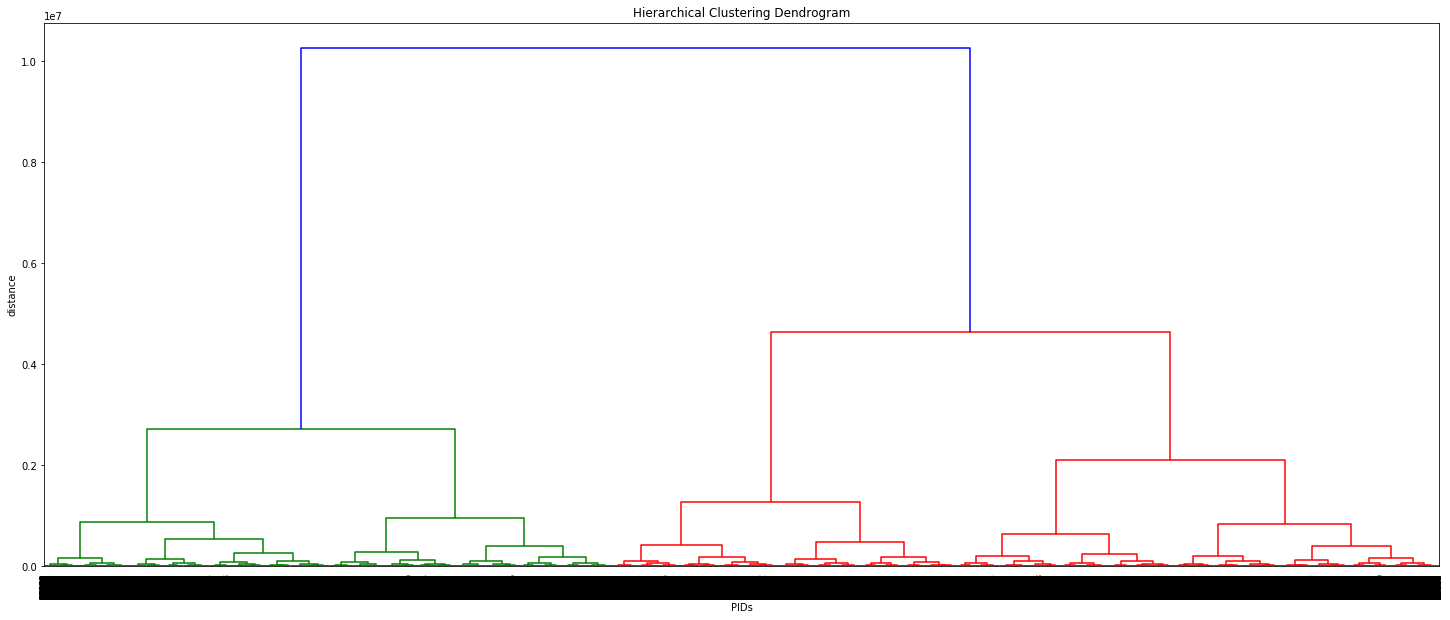

In [12]:
# calculate full dendrogram
figure = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('PIDs')
plt.ylabel('distance')
dendrogram(
    T,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [19]:
figure.savefig('../data/task2/dendrogram.jpg')

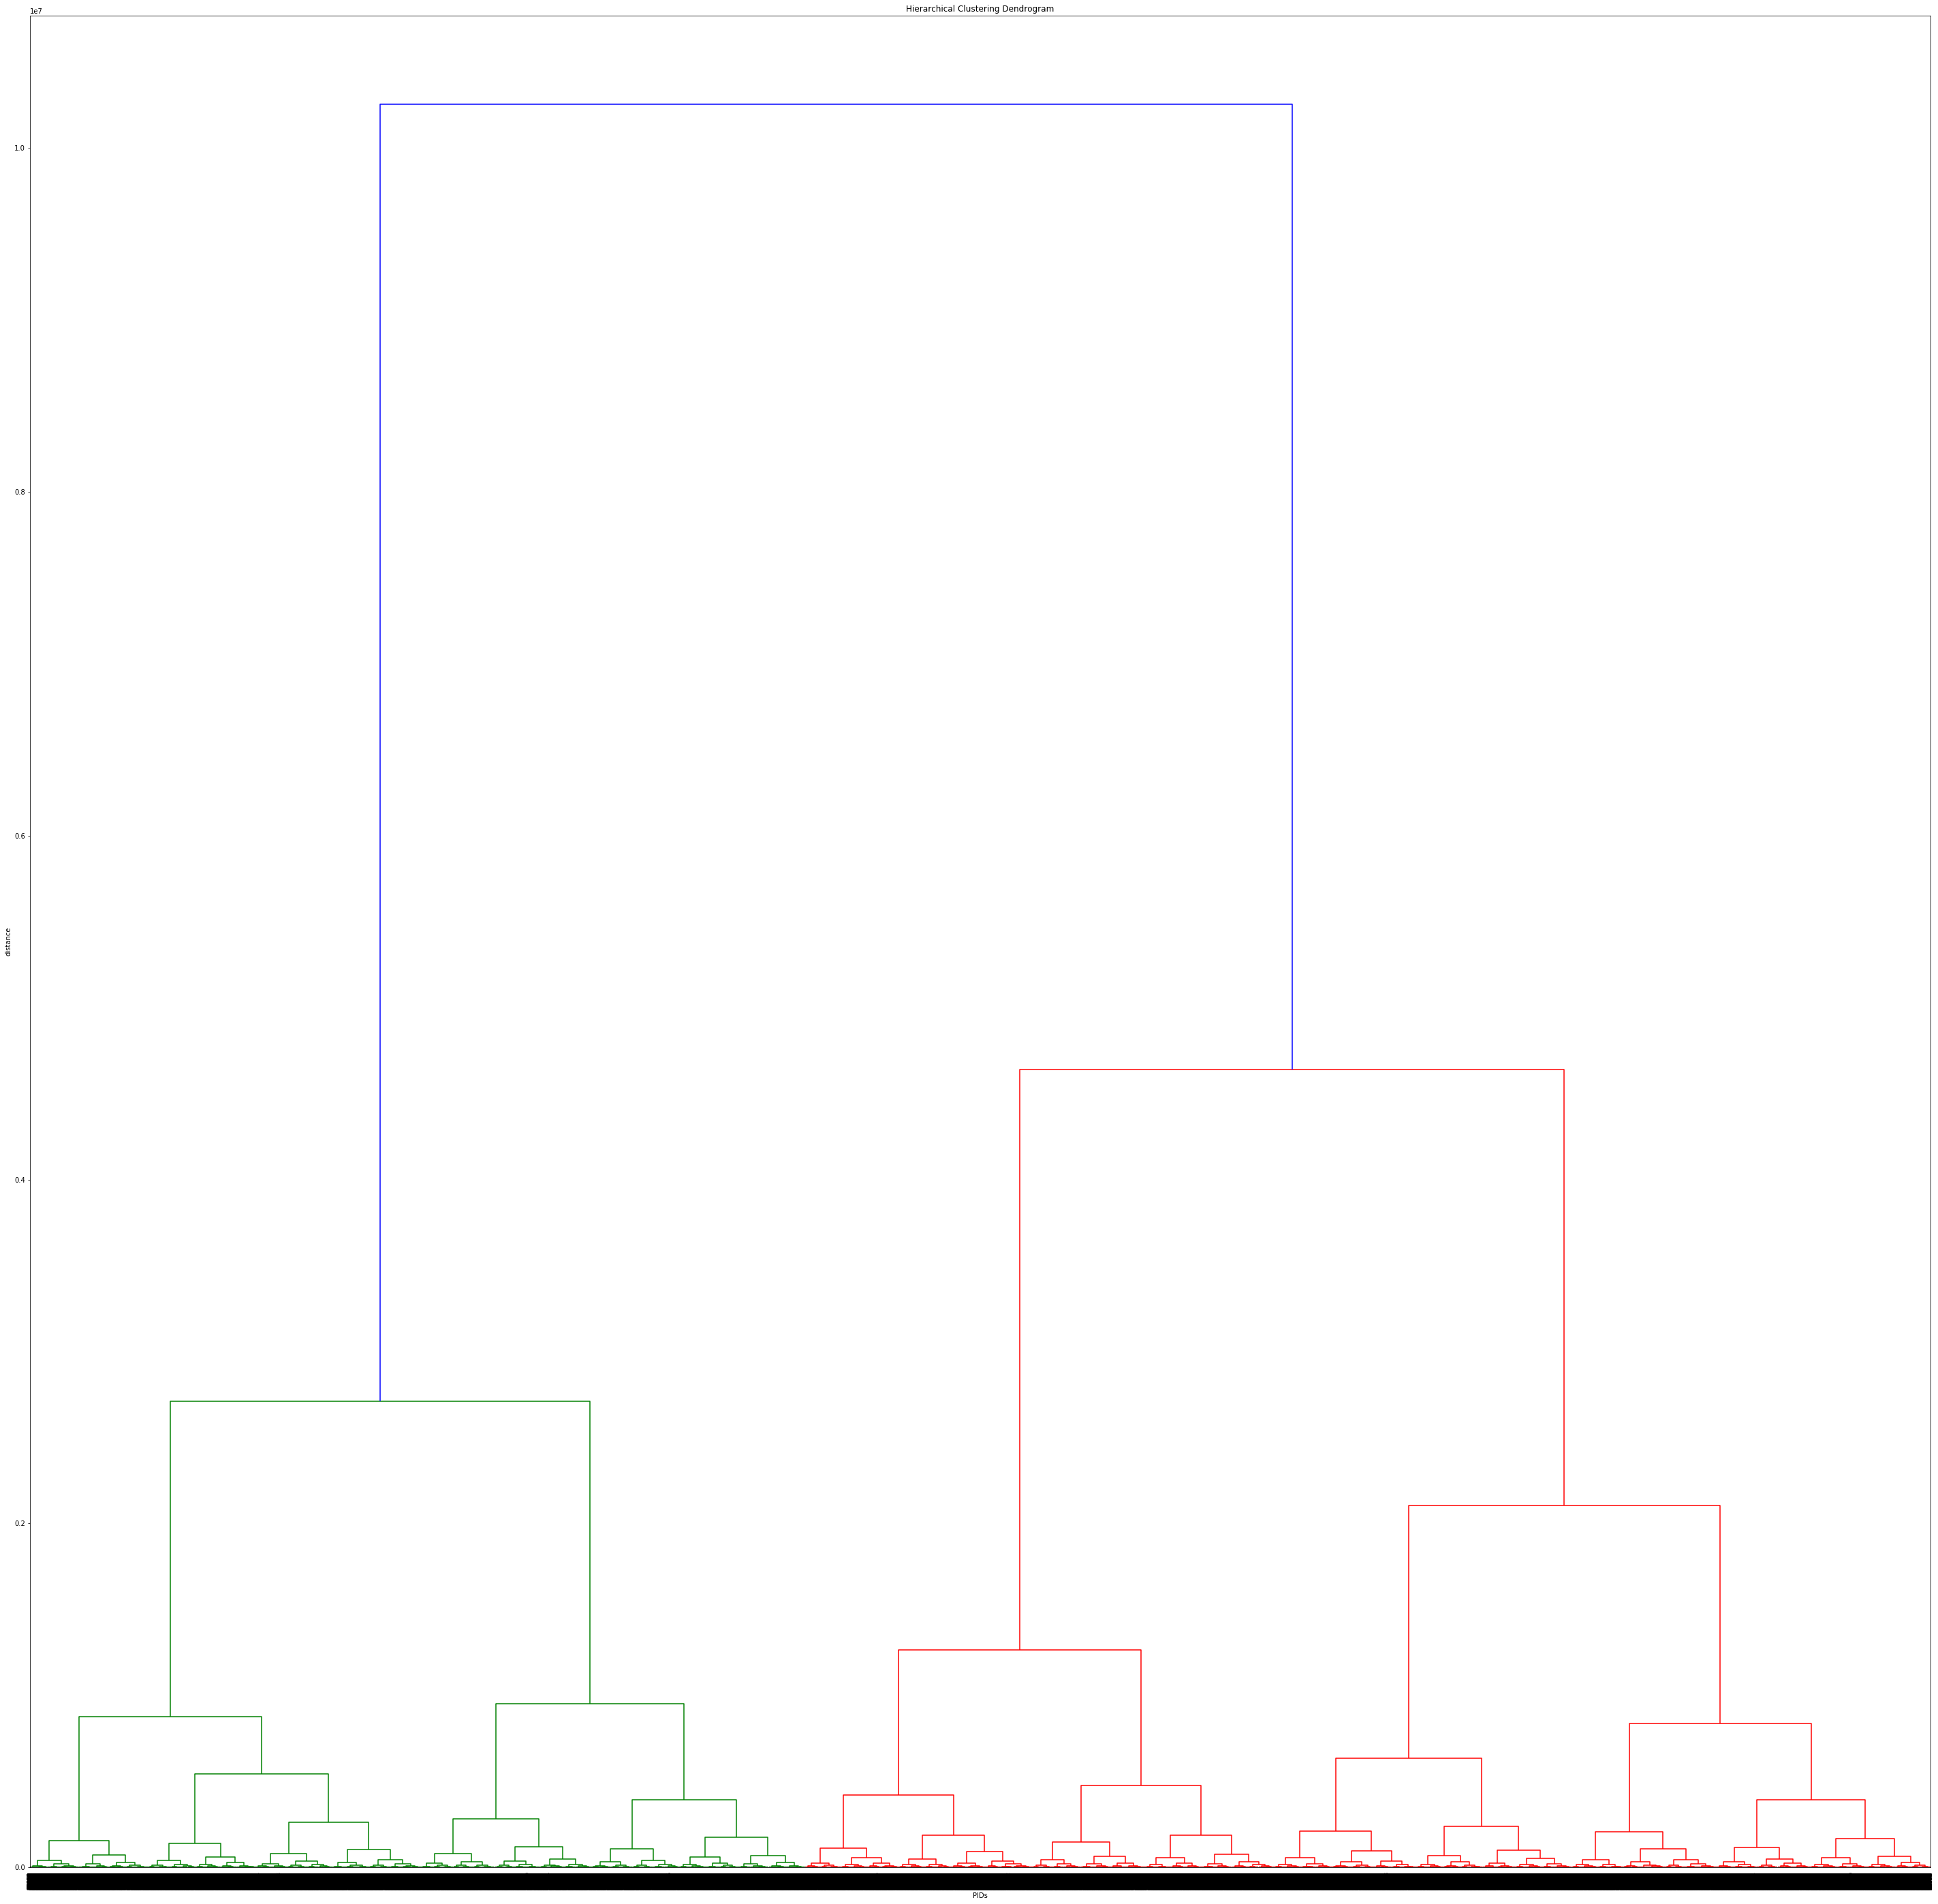

In [279]:
figure2 = plt.figure(figsize=(50,50))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('PIDs')
plt.ylabel('distance')
dendrogram(
    T,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# truncate dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('PIDs (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [248]:
w = [0]

for each in w:
    
    if each % 100 == 0:
        print("Processing row {}".format(str(each)), end="\r")
        
    p1 = df2.loc[each,].pid_1
    p2 = df2.loc[each,].pid_2
    feat_pid1 = []
    feat_pid2 = []
    p_cluster = []
        
    df_p1 = df_profiles[df_profiles.index == p1]
    df_p2 = df_profiles[df_profiles.index == p2]
    
    for i in range(66):
        j = f'p{i}'
        p1 = df_p1[j].values[0]
        feat_pid1.append(p1)
        
        p2 = df_p2[j].values[0]
        feat_pid2.append(p2)
        
    for i in range(len(feat_pid1)):
        if feat_pid1[i] == feat_pid2[i]:
            p_feat = f'p{i}'
            p_cluster.append(p_feat)
    
    df2.loc[each, 'p_features'] = str(p_cluster)

/anaconda3/envs/kdd-cup-2019/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [264]:
df_hdi = df_hierar
df_hd = df_hdi.drop(['p_features'], axis=1)

In [267]:
x = df_hd[df_hd.pid_1 < len(df_profiles)]
y = df_hd[df_hd.pid_2 < len(df_profiles)]
df_hc = pd.concat([x, y])
df_hc

pid_1    pid_2      dist  sample_count
0      43154.0  47657.0  1.414214           2.0
1       1903.0  62478.0  1.732051           2.0
2       2475.0  18454.0  1.732051           2.0
3      46763.0  46880.0  1.732051           2.0
4      18159.0  45007.0  1.732051           2.0
5       7512.0  40537.0  1.732051           2.0
6      25018.0  51927.0  1.732051           2.0
7      12657.0  57303.0  1.732051           2.0
8      36289.0  40117.0  1.732051           2.0
9       4931.0  46689.0  2.000000           2.0
10      5550.0  39277.0  2.000000           2.0
11       729.0  17371.0  2.000000           2.0
12      1199.0  32556.0  2.000000           2.0
13     20880.0  29756.0  2.000000           2.0
14     27759.0  58736.0  2.000000           2.0
15      5047.0  51813.0  2.000000           2.0
16      5082.0  14460.0  2.000000           2.0
17      5316.0   6928.0  2.000000           2.0
18      5923.0  12413.0  2.000000           2.0
19      6092.0  54061.0  2.000000           2.0
20     17289.0  28895.0  2.000000           2.0
21      7423.0  29767.0  2.000000           2.0
22     13791.0  41370.0  2.000000           2.0
23     23531.0  53886.0  2.000000           2.0
24     38176.0  49667.0  2.000000           2.0
25     41420.0  60420.0  2.000000           2.0
26     13594.0  39314.0  2.000000           2.0
27     14538.0  51080.0  2.000000           2.0
28     35027.0  53574.0  2.000000           2.0
29     25395.0  45143.0  2.000000           2.0
...        ...      ...       ...           ...
41267  40554.0  42034.0  5.830952           2.0
41541   5066.0  39130.0  5.916080           2.0
41545   9280.0  46260.0  5.916080           2.0
41547   9801.0  33463.0  5.916080           2.0
41550  13050.0  24880.0  5.916080           2.0
41554  16956.0  55495.0  5.916080           2.0
41565  22877.0  24634.0  5.916080           2.0
41573  27176.0  43337.0  5.916080           2.0
41828  25290.0  59207.0  6.000000           2.0
41834  37621.0  57510.0  6.000000           2.0
41838  35323.0  53281.0  6.000000           2.0
41840  34503.0  62399.0  6.000000           2.0
42323      3.0  30665.0  6.164414           2.0
42334  15338.0  56939.0  6.164414           2.0
42342  38230.0  41069.0  6.164414           2.0
42354  30795.0  50199.0  6.164414           2.0
42823   5685.0  10386.0  6.324555           2.0
42828   9053.0   9400.0  6.324555           2.0
43068  14853.0  59628.0  6.403124           2.0
43095  57654.0  61801.0  6.403124           2.0
43317   7115.0  30310.0  6.480741           2.0
43728   5265.0  45536.0  6.633250           2.0
43729  29155.0  38272.0  6.633250           2.0
43736  57180.0  61633.0  6.633250           2.0
43905  16735.0  27224.0  6.708204           2.0
44081   7609.0  45353.0  6.782330           2.0
44397   5505.0  58743.0  6.928203           2.0
44398   5514.0  43860.0  6.928203           2.0
44682    878.0  20994.0  7.071068           2.0
47579  32415.0  59053.0  8.831761           2.0

[63090 rows x 4 columns]

In [268]:
df_hd

pid_1     pid_2          dist  sample_count
0       43154.0   47657.0  1.414214e+00           2.0
1        1903.0   62478.0  1.732051e+00           2.0
2        2475.0   18454.0  1.732051e+00           2.0
3       46763.0   46880.0  1.732051e+00           2.0
4       18159.0   45007.0  1.732051e+00           2.0
5        7512.0   40537.0  1.732051e+00           2.0
6       25018.0   51927.0  1.732051e+00           2.0
7       12657.0   57303.0  1.732051e+00           2.0
8       36289.0   40117.0  1.732051e+00           2.0
9        4931.0   46689.0  2.000000e+00           2.0
10       5550.0   39277.0  2.000000e+00           2.0
11        729.0   17371.0  2.000000e+00           2.0
12       1199.0   32556.0  2.000000e+00           2.0
13      20880.0   29756.0  2.000000e+00           2.0
14      27759.0   58736.0  2.000000e+00           2.0
15       5047.0   51813.0  2.000000e+00           2.0
16       5082.0   14460.0  2.000000e+00           2.0
17       5316.0    6928.0  2.000000e+00           2.0
18       5923.0   12413.0  2.000000e+00           2.0
19       6092.0   54061.0  2.000000e+00           2.0
20      17289.0   28895.0  2.000000e+00           2.0
21       7423.0   29767.0  2.000000e+00           2.0
22      13791.0   41370.0  2.000000e+00           2.0
23      23531.0   53886.0  2.000000e+00           2.0
24      38176.0   49667.0  2.000000e+00           2.0
25      41420.0   60420.0  2.000000e+00           2.0
26      13594.0   39314.0  2.000000e+00           2.0
27      14538.0   51080.0  2.000000e+00           2.0
28      35027.0   53574.0  2.000000e+00           2.0
29      25395.0   45143.0  2.000000e+00           2.0
...         ...       ...           ...           ...
63059  126109.0  126123.0  1.087006e+05        3092.0
63060  126102.0  126131.0  1.103803e+05        3120.0
63061  126112.0  126127.0  1.144897e+05        3110.0
63062  126118.0  126128.0  1.203051e+05        3219.0
63063  126119.0  126134.0  1.386783e+05        3574.0
63064  126122.0  126137.0  1.459678e+05        3732.0
63065  126121.0  126140.0  1.548532e+05        3912.0
63066  126132.0  126136.0  1.685017e+05        3997.0
63067  126135.0  126139.0  1.769202e+05        4167.0
63068  126126.0  126144.0  1.854512e+05        4424.0
63069  126133.0  126141.0  1.870003e+05        4284.0
63070  126125.0  126149.0  2.051242e+05        4801.0
63071  126130.0  126145.0  2.101953e+05        4721.0
63072  126138.0  126146.0  2.402644e+05        5179.0
63073  126143.0  126147.0  2.613892e+05        5471.0
63074  126142.0  126152.0  2.821599e+05        5694.0
63075  126148.0  126157.0  3.917157e+05        7071.0
63076  126151.0  126156.0  3.930307e+05        7107.0
63077  126150.0  126158.0  4.200800e+05        7544.0
63078  126154.0  126159.0  4.746057e+05        8016.0
63079  126153.0  126163.0  5.425402e+05        9045.0
63080  126161.0  126162.0  6.358364e+05        9900.0
63081  126160.0  126166.0  8.380540e+05       11908.0
63082  126155.0  126169.0  8.761780e+05       12957.0
63083  126164.0  126165.0  9.534468e+05       12765.0
63084  126167.0  126168.0  1.263563e+06       15560.0
63085  126170.0  126171.0  2.103807e+06       21808.0
63086  126172.0  126173.0  2.709761e+06       25722.0
63087  126174.0  126175.0  4.638968e+06       37368.0
63088  126176.0  126177.0  1.025523e+07       63090.0

[63089 rows x 4 columns]

In [274]:
len(df_hd[df_hd.sample_count == 130])

5

In [ ]:
idx >= len(X)
Z[idx - len(X)]

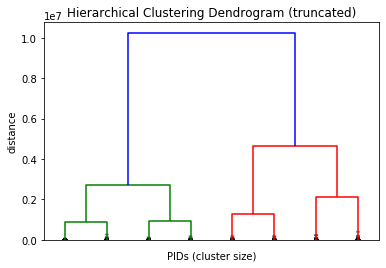

In [277]:
# truncate dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('PIDs (cluster size)')
plt.ylabel('distance')
dendrogram(
    T,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [280]:
df_hierc = pd.read_csv('../data/raw/profiles.csv')
df_hierc

pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p56  p57  \
0      196356  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1      204083  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2      170667  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
3      115511  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
4      129719  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
5      174347  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
6      143618  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
7      116999  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
8      194535  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
9      125275  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
10     138709  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
11     145774  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
12     110116  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
13     127217  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
14     153142  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
15     115485  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
16     113666  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
17     122046  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
18     167717  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
19     141405  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
20     186565  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
21     165770  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
22     127706  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
23     113516  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
24     127912  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
25     135378  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
26     215572  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
27     104039  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
28     101221  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
29     133559  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
63060  177571  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63061  160099  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63062  187865  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63063  151880  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63064  204949  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63065  158320  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63066  148673  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63067  209025  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63068  192010  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63069  123444  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63070  180496  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63071  155958  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63072  185094  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63073  164127  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63074  187839  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63075  179816  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63076  138212  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63077  100087  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63078  215762  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63079  161736  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63080 

In [281]:
T

array([[4.31540000e+04, 4.76570000e+04, 1.41421356e+00, 2.00000000e+00],
       [1.90300000e+03, 6.24780000e+04, 1.73205081e+00, 2.00000000e+00],
       [2.47500000e+03, 1.84540000e+04, 1.73205081e+00, 2.00000000e+00],
       ...,
       [1.26172000e+05, 1.26173000e+05, 2.70976106e+06, 2.57220000e+04],
       [1.26174000e+05, 1.26175000e+05, 4.63896804e+06, 3.73680000e+04],
       [1.26176000e+05, 1.26177000e+05, 1.02552319e+07, 6.30900000e+04]])

In [289]:
cluster4_id = fcluster(T, 4, criterion='maxclust')
cluster4_id

array([4, 4, 3, ..., 1, 2, 1], dtype=int32)

In [285]:
cluster8_id = fcluster(T, 8, criterion='maxclust')
cluster8_id

array([8, 8, 5, ..., 1, 3, 2], dtype=int32)

In [286]:
cluster16_id = fcluster(T, 16, criterion='maxclust')
cluster16_id

array([16, 15,  9, ...,  1,  5,  2], dtype=int32)

In [287]:
cluster36_id = fcluster(T, 36, criterion='maxclust')
cluster36_id

array([35, 33, 19, ...,  2,  9,  4], dtype=int32)

In [296]:
np.save('../data/task2/hierarchical/cluster36.npy', cluster36_id)

In [290]:
cluster = [4, 8, 16, 36]

for each in cluster:
    df_hierc[f'cluster{each}_id']=np.nan
df_hierc

pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p60  p61  \
0      196356  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1      204083  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2      170667  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
3      115511  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
4      129719  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
5      174347  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
6      143618  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
7      116999  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
8      194535  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
9      125275  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
10     138709  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
11     145774  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
12     110116  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
13     127217  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
14     153142  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
15     115485  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
16     113666  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
17     122046  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
18     167717  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
19     141405  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
20     186565  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
21     165770  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
22     127706  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
23     113516  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
24     127912  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
25     135378  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
26     215572  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
27     104039  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
28     101221  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
29     133559  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
63060  177571  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63061  160099  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63062  187865  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63063  151880  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
63064  204949  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63065  158320  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63066  148673  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63067  209025  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
63068  192010  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
63069  123444  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63070  180496  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63071  155958  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63072  185094  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
63073  164127  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
63074  187839  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63075  179816  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63076  138212  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
63077  100087  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63078  215762  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63079  161736  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63080 

In [298]:
for each in range(len(df_hierc)):
    x = cluster36_id[each]
    df_hierc.loc[df_hierc.index == each, 'cluster36_id'] = str(x)
df_hierc

pid   p0   p1   p2   p3   p4   p5   p6   p7   p8  ...  p60  p61  \
0      196356  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1      204083  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2      170667  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
3      115511  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
4      129719  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
5      174347  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
6      143618  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
7      116999  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
8      194535  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
9      125275  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
10     138709  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
11     145774  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
12     110116  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
13     127217  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
14     153142  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
15     115485  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
16     113666  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
17     122046  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
18     167717  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
19     141405  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
20     186565  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
21     165770  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
22     127706  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
23     113516  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
24     127912  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
25     135378  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
26     215572  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
27     104039  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
28     101221  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
29     133559  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
63060  177571  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63061  160099  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63062  187865  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63063  151880  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
63064  204949  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63065  158320  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63066  148673  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63067  209025  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0   
63068  192010  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0   
63069  123444  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63070  180496  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63071  155958  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63072  185094  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
63073  164127  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
63074  187839  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63075  179816  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63076  138212  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
63077  100087  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
63078  215762  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
63079  161736  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
63080 

In [299]:
df_hierc.to_csv("../data/task2/hierarchical/df_hierc.csv")

In [307]:
n_cluster = df_hierc.cluster36_id.unique()
cluster36 = []

for each in n_cluster:
    x = str(each)
    a = np.array(df_hierc.pid.loc[df_hierc['cluster36_id'] == x])
    cluster36.append(a)
len(cluster36)

36

In [308]:
np.save('../data/task2/hierarchical/cluster36.npy', cluster36)